In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [189]:
df_og = pd.read_csv("/data/workspace_files/NFCS 2018 State Data 190603.csv")
#df_og

# Housecleaning

## fixing when people got financial education

In [190]:
df_education_melt = pd.melt(df_og,id_vars=['NFCSID'], value_vars=['M21_1','M21_2_2015','M21_3','M21_4'],
        var_name='WhenEd', value_name='FinEdYN')
#df_education_melt

In [191]:
df_education_melt_yes = df_education_melt[df_education_melt['FinEdYN'] == '1']
#df_education_melt_yes.FinEdYN.unique()

In [192]:
#df_education_melt_yes

In [193]:
fin_ed_map = {
    'WhenEd':{
        #0 means never
        'M21_1': '1',
        'M21_2_2015': '2',
        'M21_3': '3',
        'M21_4': '4'
    }
}
df_education_melt_yes = df_education_melt_yes.replace(fin_ed_map)

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(
    data = df_education_melt_yes,
    x = 'WhenEd'
)

In [194]:
df = pd.merge(df_og, df_education_melt_yes, how = 'outer', on = 'NFCSID') 
#df

In [195]:
df['FinEdYN'] =df['FinEdYN'].fillna('0')
df['WhenEd'] = df['WhenEd'].fillna('0')
#df

## make own test results

In [196]:
six_questions = ['NFCSID','M6','M7','M8','M31','M9','M10']

In [197]:
six_qs_df =df.loc[:,six_questions]

In [198]:
#six_qs_df.dtypes

In [199]:
six_qs_map = {
    'M6':{
        1 : 1,
        2 : 0,
        3 : 0,
        98 : 0,
        99 : 0
    },
    'M7':{
        1 : 0,
        2 : 0,
        3 : 1, 
        98 : 0,
        99 : 0
    },
    'M8':{
        1 : 0,
        2 : 1,
        3 : 0, 
        4 : 0, 
        98 : 0, 
        99 : 0
    },
    'M31':{
        1 : 0, 
        2 : 1, 
        3 : 0, 
        4 : 0, 
        98 : 0, 
        99 : 0
    },
    'M9':{
        1 : 1, 
        2 : 0, 
        98 : 0, 
        99 : 0
    },
    'M10':{
        1 : 0, 
        2 : 1, 
        98 : 0, 
        99 : 0, 
    }
}

In [200]:
six_qs_df = six_qs_df.replace(six_qs_map)

In [201]:
for ind, row in six_qs_df.iterrows():
        six_qs_df.loc[ind, 'PC'] = round(((row['M6'] + row['M7']+ row['M8']+ row['M31']+ row['M9']+row['M10'])/6)*100)

In [202]:
six_qs_df = six_qs_df.drop(columns = ['M6','M7','M8','M31','M9','M10'])
#six_qs_df

In [203]:
six_qs_df['PC'].unique()

array([ 33.,  50.,   0.,  67.,  17.,  83., 100.])

In [204]:
df = pd.merge(df, six_qs_df, on = 'NFCSID')
#df

In [205]:
#look at next section
df_cor = df.drop(columns = ['NFCSID', 'wgt_n2', 'wgt_d2', 'wgt_s3','M6','M7','M8','M31','M9','M10','M21_1','M21_2_2015','M21_3','M21_4'])

In [206]:
df = df.replace(' ', 999)
df = df.applymap(int)
df_before_drop =df.applymap(int)
df = df.replace([999, 99, 98], np.NaN)

## Setting up correlation matrix

In [207]:
#done earlier
#df_cor = df.drop(columns = ['NFCSID', 'wgt_n2', 'wgt_d2', 'wgt_s3','M6','M7','M8','M31','M9','M10','M21_1','M21_2_2015','M21_3','M21_4'])

In [208]:
column_values = df_cor.values.ravel()
unique_values =  pd.unique(column_values)
#print(unique_values)

In [209]:
df_cor = df_cor.replace(' ', 999)

In [210]:
df_cor = df_cor.applymap(int)

In [211]:
df_cor = df_cor.replace([99, 98, 999], np.NaN)

In [212]:
Change_j3 = {
    'J3':{
        1:-1,
        2:0,
        3:1
    }
}
df_cor = df_cor.replace(Change_j3)

Change_m20 = {
    'M20':{
        1:2,
        2:1,
        3:3
    }
}
df_cor = df_cor.replace(Change_m20)

Change_F1 = {
    'F1':{
        1:1,
        2:2,
        3:3,
        4:4,
        5:5,
        6:6,
        7:0
    }
}
df_cor = df_cor.replace(Change_F1)

In [213]:
column_values = df_cor.values.ravel()
unique_values =  pd.unique(column_values)
#print(unique_values)

In [214]:
corr = df_cor.corr()

#Currently as Markdown to prevent in from running, but if you want to use it go ahead!


for i in df_cor.columns:
    if .90 > corr[i].nlargest(2)[1] >= .80 or -.90 < corr[i].min() <= -.80:
        print(i) 
        print(corr[i].sort_values(ascending = False).head(20))
        print(corr[i].sort_values(ascending = False).tail(28))    
        print('')
        print('')

print(corr['A4A_new_w'].sort_values(ascending = False).head(20))
print(corr['A4A_new_w'].sort_values(ascending = False).tail(28)) 

# Specials Groups

## Just non-white individuals

In [215]:
within_NW_df = df[df['A4A_new_w'] == 2]

cor_within_NW_df = within_NW_df.drop(columns = ['NFCSID', 'wgt_n2', 'wgt_d2', 'wgt_s3','M6','M7','M8','M31','M9','M10','M21_1','M21_2_2015','M21_3','M21_4'])
Change_j3 = {'J3':{1:-1,2:0,3:1}}
cor_within_NW_df = cor_within_NW_df.replace(Change_j3)

Change_m20 = {'M20':{ 1:2, 2:1, 3:3}}
cor_within_NW_df = cor_within_NW_df.replace(Change_m20)

Change_F1 = {'F1':{ 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:0 }}
cor_within_NW_df = cor_within_NW_df.replace(Change_F1)

within_NW_corr = cor_within_NW_df.corr()

In [216]:
print(within_NW_corr['PC'].sort_values(ascending = False).head((15)))
print(within_NW_corr['PC'].sort_values(ascending = False).tail(16)) 

PC          1.000000
E20         0.419520
C11_2012    0.414371
C10_2012    0.391079
A5_2015     0.369747
AM30        0.362540
E8          0.292070
F2_5        0.288114
A3Ar_w      0.287953
F2_3        0.280458
A8          0.276944
F2_6        0.276368
D40         0.267031
M41         0.260458
F2_4        0.255197
Name: PC, dtype: float64
C1_2012     -0.167379
B1          -0.176921
J41_3       -0.176946
J33_40      -0.187157
G25_2       -0.199255
G25_1       -0.202000
G25_5       -0.208722
J33_41      -0.211376
G25_3       -0.217146
J20         -0.217227
G25_4       -0.219427
J41_1       -0.223036
J41_2       -0.228470
J9          -0.332935
E15_2015    -0.381663
A4A_new_w         NaN
Name: PC, dtype: float64


## Individuals between the age of 18-24

In [217]:
younger_df = df[df['A3Ar_w'] == 1]

cor_younger_df = younger_df.drop(columns = ['NFCSID', 'wgt_n2', 'wgt_d2', 'wgt_s3','M6','M7','M8','M31','M9','M10','M21_1','M21_2_2015','M21_3','M21_4'])
Change_j3 = {'J3':{1:-1,2:0,3:1}}
cor_younger_df = cor_younger_df.replace(Change_j3)

Change_m20 = {'M20':{ 1:2, 2:1, 3:3}}
cor_younger_df = cor_younger_df.replace(Change_m20)

Change_F1 = {'F1':{ 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:0 }}
cor_younger_df = cor_younger_df.replace(Change_F1)

younger_df_corr = cor_younger_df.corr()

In [218]:
print(younger_df_corr['PC'].sort_values(ascending = False).head((10)))
print(younger_df_corr['PC'].sort_values(ascending = False).tail(11)) 

PC          1.000000
C11_2012    0.289041
M1_2        0.284634
A5_2015     0.274369
A41         0.260861
C10_2012    0.259044
FinEdYN     0.243627
M4          0.238683
M1_1        0.231643
B40         0.212070
Name: PC, dtype: float64
J8          -0.173429
B1          -0.173875
A4A_new_w   -0.175594
J41_1       -0.181304
A22_2015    -0.185032
M40         -0.201246
J9          -0.218218
M20         -0.231683
J20         -0.243869
E15_2015    -0.276592
A3Ar_w            NaN
Name: PC, dtype: float64


# Important note

As we can see down below, when looking at education and age, that the 'Some college, no degree' group in the non-white group is overhelmingly 25-34, so when looking at this group we'll focus in this age group to take into account any bias that age would bring in.

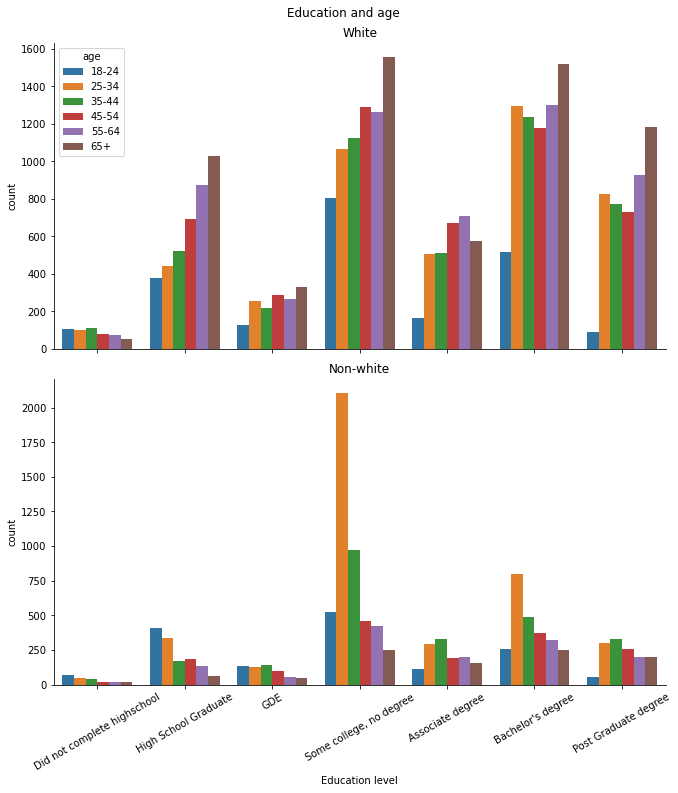

In [219]:
g = sns.catplot(x="A5_2015", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'A3Ar_w',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

g._legend.set_title('age')
new_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Education level")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']);
g.set_xticklabels(rotation=30)

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Education and age');

# Analysis (Education)

## example (graphs by proportion)

In [220]:
value_map_educ_sav_inc = {  
    #'A5_2015':{
        #1: "Did not complete high school",
        #2: "High school graduate - regular high school diploma",
        #3: "High school graduate - GED or alternative credential",
        #4: "Some college, no degree",
       # 5: "Associate's degree",
       # 6: "Bachelor's degree",
       # 7: "Post graduate degree"
    #},
    'A5_2015':{
        1: "No HS",
        2: "HS Diploma",
        3: "HS Grad/GED/Equiv",
        4: "Some college, no degree",
        5: "Associate's degree",
        6: "Bachelor's degree",
        7: "Post graduate degree"
    },
    'A41':{
        1.0: 'Did not complete high school',
        2.0: 'High school graduate/GED',
        3.0: 'Some college, no degree',
        4.0: 'Associate’s degree',
        5.0: 'Bachelor’s degree',
        6.0: 'Post graduate degree'   
    },
    'J5': {
        1: "Yes",
        2 : "No"
    },
    'J20': {
        1: "I am certain I could come up with the full $2,000",
        2: "I could probably come up with $2,000",
        3: "I could probably not come up with $2,000",
        4: "I am certain I could not come up with $2,000"
    },
    'C1_2012': {
        1: "Yes",
        2 : "No"
    }, 
    'C4_2012':{
        1: "Yes",
        2 : "No"
    },
    'C5_2012': {
        1 : "Yes",
        2 : "No"
    },            
    'J8': {
        1 : "Yes",
        2 : "No"
    }, 
    'B2': {
        1 : "Yes",
        2 : "No"
    },
    'B14': {
        1 : "Yes",
        2 : "No"
    },
    'A8':{
        1: "Less than $15,000",
        2: "At least $15,000 but less than $25,000",
        3: "At least $25,000 but less than $35,000",
        4: "At least $35,000 but less than $50,000",
        5: "At least $50,000 but less than $75,000",
        6: "At least $75,000 but less than $100,000",
        7: "At least $100,000 but less than $150,000",
        8: "$150,000 or more"
    }, 
    'J3':{
        1: "Spending less than income",
        2: "Spending more than income",
        3: "Spending about equal to income"
    },
    'J41_2':{
        1: "Does not describe me at all",
        2: "Describes me very little",
        3: "Describes me somewhat",
        4: "Describes me very well",
        5: "Describes me completely"
        
    }, 
    'J42_1':{
        1: "Does not describe me at all",
        2: "Describes me very little",
        3: "Describes me somewhat",
        4: "Describes me very well",
        5: "Describes me completely"
    }, 
    'J4':{
        1: "Very difficult",
        2: "Somewhat difficult",
        3: "Not at all difficult"
    }, 
    'D40':{
        1: "Yes",
        2: "No"
    },
    'J10':{
        1: "Yes",
        2: "No"
    },
    'G23':{
        1: "1 - Strongly Disagree",
        2: "2 - Disagree",
        3: "3 - Somewhat Disagree",
        4: "4 - Neither Agree nor Disagree",
        5: "5 - Somewhat Agree",
        6: "6 - Agree",
        7: "7 - Strongly Agree"
    },
    'G38':{
        1: "Yes",
        2: "No"
    },
    'J3':{
        1: "Spending less than income",
        2: "Spending more than income",
        3: "Spending about equal to income"
    },
    'J42_1':{
        1: "Never",
        2: "Rarely",
        3: "Sometimes",
        4: "Often",
        5: "Always"
    },
    'J4':{
        1: "Very difficult",
        2: "Somewhat difficult",
        3: "Not at all difficult"
        
    },
    'A3Ar_w':{
        1: "18-24",
        2: "25-34",
        3: "35-44",
        4: "45-54",
        5: "55-64",
        6: "65+"
    }
    
}

In [221]:
spending_colMap={
'J3':"Over the past year, would you say your [household's] spending was less than, more than, or about equal to your [household's] income?",
'J42_1': "How often do these statements apply to you? - I have money left over at the end of the month",
'J4': "In a typical month, how difficult is it for you to cover your expenses and pay all your bills?"
}

In [222]:
#creating an spending-specific dataframe
#debt_df = df[['NFCSID','G23','A4A_new_w', 'A5_2015']]

In [223]:
#debt_df

In [224]:
#value map
#spending_df = spending_df.replace(value_map_educ_sav_inc)

In [225]:
#dataframe for J3 column  'A5_2015'
#G23_df2 = debt_df.groupby(['A4A_new_w', 'A5_2015']).G23.value_counts(normalize=True).to_frame(name = 'proportion_G23').reset_index()

In [226]:
#G23_df2.head()

In [227]:
#specify order for educational levels
#educ_order = ['No HS', 'HS Grad/GED/Equiv', 'HS Diploma', 'Some college, no degree', 'Associate\'s degree', 'Bachelor\'s degree', 'Post graduate degree']

In [228]:
debt_df = df[['NFCSID','G23','A4A_new_w', 'A5_2015']]
G23_df2 = debt_df.groupby(['A4A_new_w','A5_2015']).G23.value_counts(normalize=True).to_frame(name = 'proportion_G23').reset_index()

# Analysis (Race and Race/Education)

## View of debt by race and education

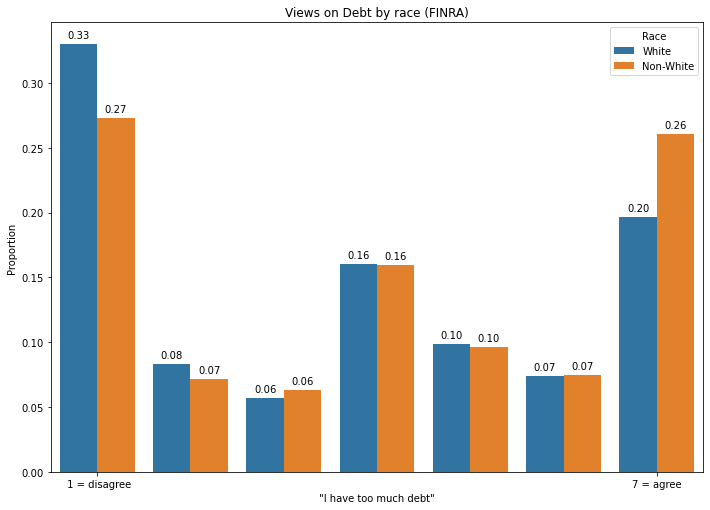

In [229]:
#graphing it

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g= sns.barplot(
    x = 'G23',
    y='proportion_G23',
    data = G23_df2,
    hue='A4A_new_w',
    #order = educ_order,
    ci=None)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_title('Views on Debt by race (FINRA)')
#plt.xticks(rotation = 90);

legend = plt.legend()
legend.set_title("Race")
for t, l in zip(legend.texts,("White", "Non-White")):
    t.set_text(l)

#plt.legend().set_title('check')
#plt.legend();

ax.set(xlabel='"I have too much debt"', ylabel='Proportion')
plt.xticks([0, 6], [' 1 = disagree','7 = agree']);

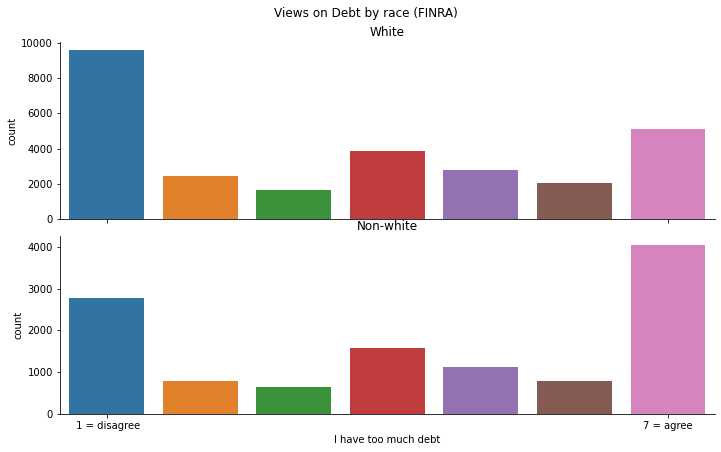

In [230]:
g = sns.catplot(x="G23", 
                row="A4A_new_w", kind = 'count', data=df,
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )
g.fig.set_size_inches(10,6)
#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("I have too much debt")
plt.xticks([0, 6], [' 1 = disagree','7 = agree']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Views on Debt by race (FINRA)');

In [231]:
print('A4A is race, 1 is white, 2 is non-white')
print('G23 is the debt statement \n ')
round(df.groupby(['A4A_new_w'])['G23'].value_counts(normalize = True).sort_index() *100, 2)

A4A is race, 1 is white, 2 is non-white
G23 is the debt statement 
 


A4A_new_w  G23
1          1.0    34.85
           2.0     8.84
           3.0     6.00
           4.0    14.08
           5.0    10.18
           6.0     7.43
           7.0    18.62
2          1.0    23.60
           2.0     6.65
           3.0     5.42
           4.0    13.51
           5.0     9.62
           6.0     6.72
           7.0    34.48
Name: G23, dtype: float64

There is a noticeable difference between white and non white people with regards to their perception of their own debt. Roughly 35% of white individuals fully disagree with the statement "I have too much debt", while only 19% of white individuals fully agree. Compare this with the 24% of non-white individuals who fully disagree with the statement, and the 34% who fully agree. 

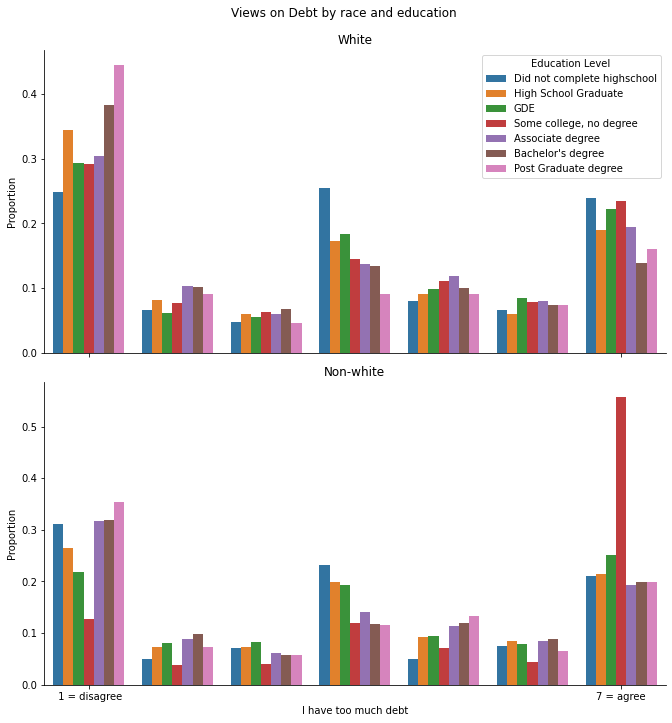

In [232]:
g = sns.catplot(x="G23",
                y= 'proportion_G23',
                row="A4A_new_w", kind = 'bar', data=G23_df2,
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False,
                ci=None
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("I have too much debt", 'Proportion')
plt.xticks([0, 6], [' 1 = disagree','7 = agree']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Views on Debt by race and education');

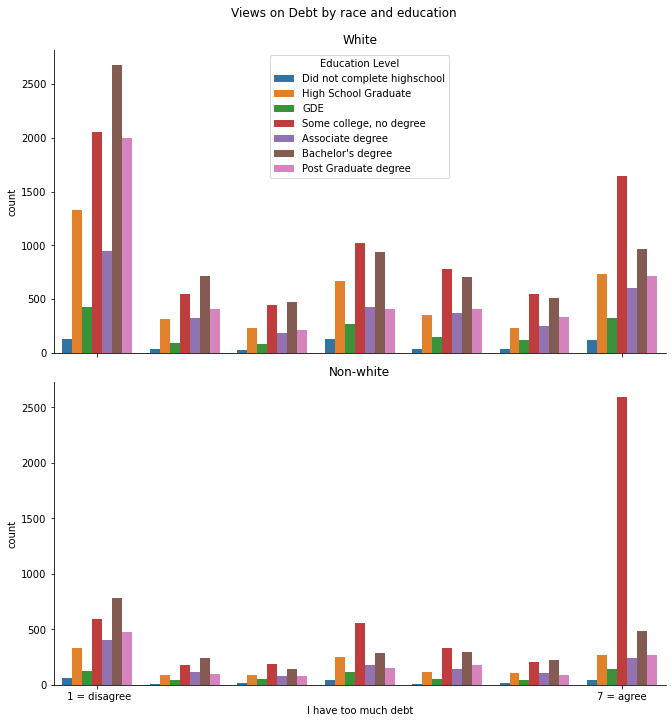

In [233]:
g = sns.catplot(x="G23", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("I have too much debt")
plt.xticks([0, 6], [' 1 = disagree','7 = agree']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Views on Debt by race and education');

When we take a closer look, we see that a massive portion of non-white individuals who fully agree with that statement are individuals who had some college education but did not recieve a degree.

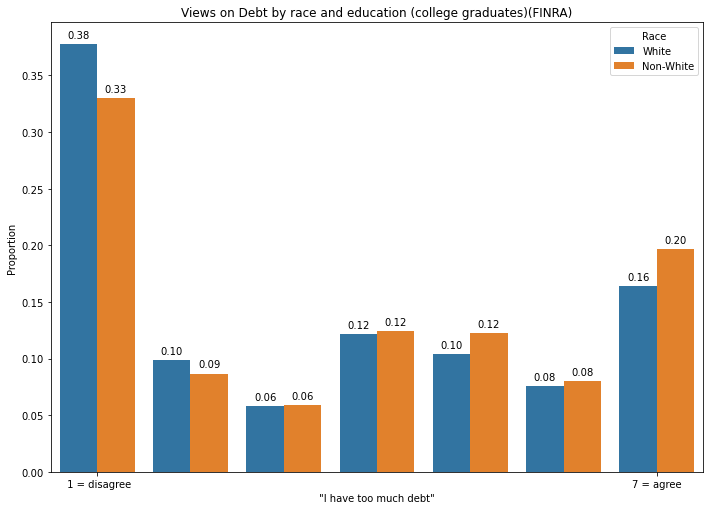

In [234]:
#graphing it

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g= sns.barplot(
    x = 'G23',
    y='proportion_G23',
    data = G23_df2[G23_df2['A5_2015'] > 4],
    hue='A4A_new_w',
    #order = educ_order,
    ci=None)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_title('Views on Debt by race and education (college graduates)(FINRA)')
#plt.xticks(rotation = 90);

legend = plt.legend()
legend.set_title("Race")
for t, l in zip(legend.texts,("White", "Non-White")):
    t.set_text(l)

#plt.legend().set_title('check')
#plt.legend();

ax.set(xlabel='"I have too much debt"', ylabel='Proportion')
plt.xticks([0, 6], [' 1 = disagree','7 = agree']);

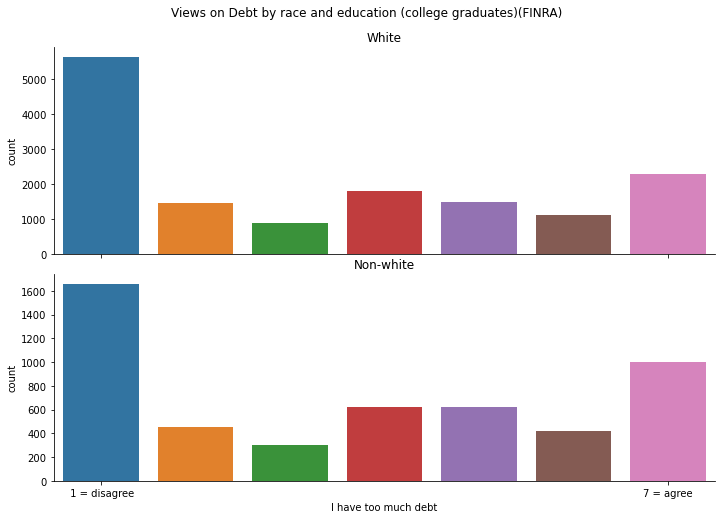

In [235]:
g = sns.catplot(x="G23", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] > 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )
g.fig.set_size_inches(10,7)
#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("I have too much debt")
plt.xticks([0, 6], [' 1 = disagree','7 = agree']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Views on Debt by race and education (college graduates)(FINRA)');

In [236]:
contigency_debt= pd.crosstab(df[df['A5_2015'] > 4]['G23'], df[df['A5_2015'] > 4]['A4A_new_w'],normalize='columns')
chi2_contingency(contigency_debt)

(0.012014215926803405,
 0.9999999640342836,
 6,
 array([[0.35679795, 0.35679795],
        [0.0939978 , 0.0939978 ],
        [0.05915228, 0.05915228],
        [0.12237611, 0.12237611],
        [0.11191169, 0.11191169],
        [0.07866851, 0.07866851],
        [0.17709566, 0.17709566]]))

In [237]:
contigency_debt
#total_proportion_debt = (df.Survived == "Survived").mean()

A4A_new_w,1,2
G23,,
1.0,0.385853,0.327743
2.0,0.098809,0.089187
3.0,0.059504,0.058800
4.0,0.122021,0.122731
5.0,0.101684,0.122139
6.0,0.075253,0.082084
7.0,0.156875,0.197316


In [238]:
round(df[df['A5_2015'] > 4].groupby(['A4A_new_w'])['G23'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  G23
1          1.0    38.59
           2.0     9.88
           3.0     5.95
           4.0    12.20
           5.0    10.17
           6.0     7.53
           7.0    15.69
2          1.0    32.77
           2.0     8.92
           3.0     5.88
           4.0    12.27
           5.0    12.21
           6.0     8.21
           7.0    19.73
Name: G23, dtype: float64

When we focus on individuals who did gain a college diploma, we see that the distribution of answers are roughly the same. The percentage of those who fully disagree with the debt statement between white and nonwhite individuals is 39% and 32%, respectivly, and 16% and 20% for those who fully agree.

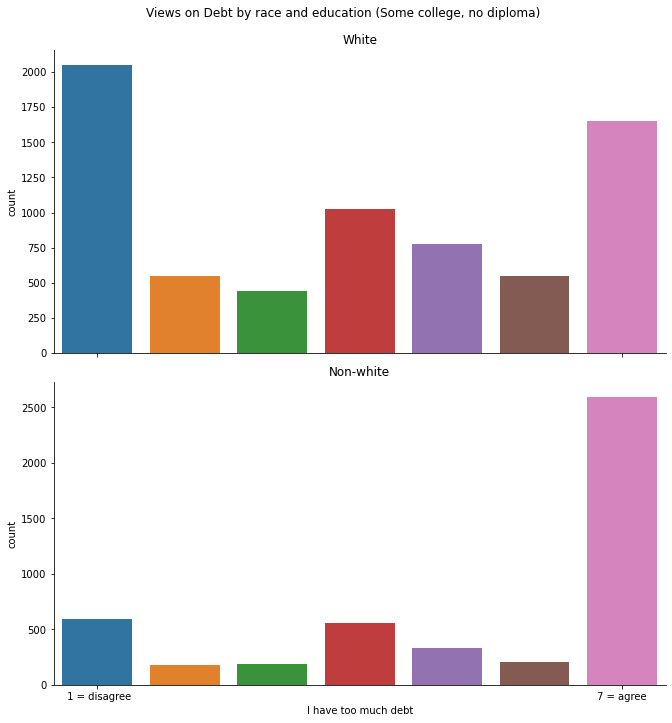

In [239]:
g = sns.catplot(x="G23", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] == 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("I have too much debt")
plt.xticks([0, 6], [' 1 = disagree','7 = agree']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Views on Debt by race and education (Some college, no diploma)');

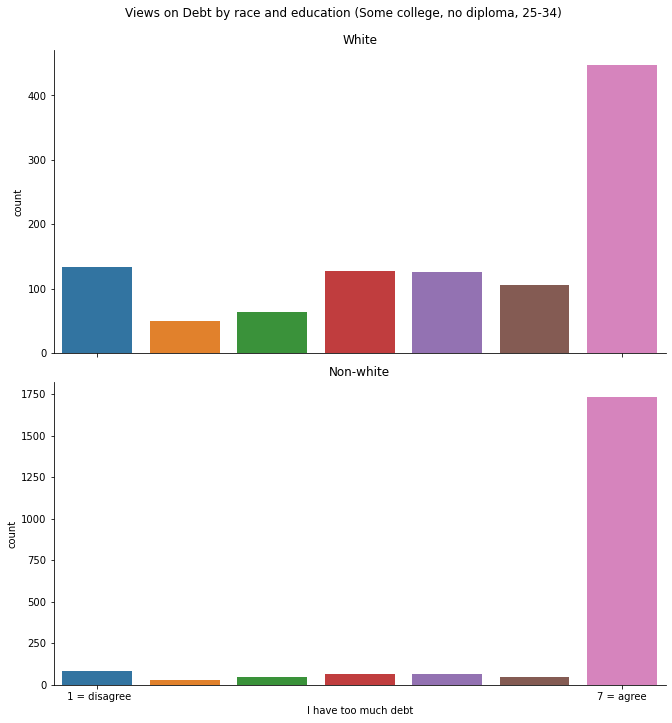

In [240]:
g = sns.catplot(x="G23", 
                row="A4A_new_w", kind = 'count', data=df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)],
                #hue = 'A3Ar_w',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('age')
#new_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("I have too much debt")
plt.xticks([0, 6], [' 1 = disagree','7 = agree']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Views on Debt by race and education (Some college, no diploma, 25-34)');

In [241]:
contigency= pd.crosstab(df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)]['G23'], df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)]['A4A_new_w'], normalize='columns')
chi2_contingency(contigency)

(0.3683782235939124,
 0.9990923352687305,
 6,
 array([[0.08344407, 0.08344407],
        [0.03026658, 0.03026658],
        [0.04078935, 0.04078935],
        [0.07601197, 0.07601197],
        [0.07577879, 0.07577879],
        [0.06169902, 0.06169902],
        [0.63201022, 0.63201022]]))

In [242]:
round(df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)].groupby(['A4A_new_w'])['G23'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  G23
1          1.0    12.73
           2.0     4.75
           3.0     5.98
           4.0    12.06
           5.0    11.97
           6.0     9.97
           7.0    42.55
2          1.0     3.96
           2.0     1.30
           3.0     2.17
           4.0     3.14
           5.0     3.19
           6.0     2.37
           7.0    83.86
Name: G23, dtype: float64

At first, we see a massive difference in pattern between those who entered college and then did not graduate between white and non-white people, but this difference fades when we take age into account. However, the magnitude of the proportions are drastically different. The percentage of those who full disagreed with the debt statement between white and non-white individuals is 13% and 3%, respectivly. The percentage who fully agreed with the statement is 43% and 84%%, a massive difference.

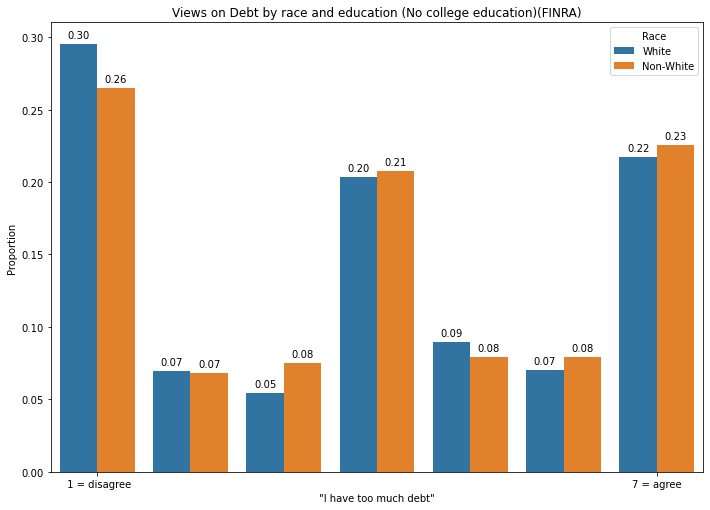

In [243]:
#graphing it

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g= sns.barplot(
    x = 'G23',
    y='proportion_G23',
    data = G23_df2[G23_df2['A5_2015'] < 4],
    hue='A4A_new_w',
    #order = educ_order,
    ci=None)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_title('Views on Debt by race and education (No college education)(FINRA)')
#plt.xticks(rotation = 90);

legend = plt.legend()
legend.set_title("Race")
for t, l in zip(legend.texts,("White", "Non-White")):
    t.set_text(l)

#plt.legend().set_title('check')
#plt.legend();

ax.set(xlabel='"I have too much debt"', ylabel='Proportion')
plt.xticks([0, 6], [' 1 = disagree','7 = agree']);

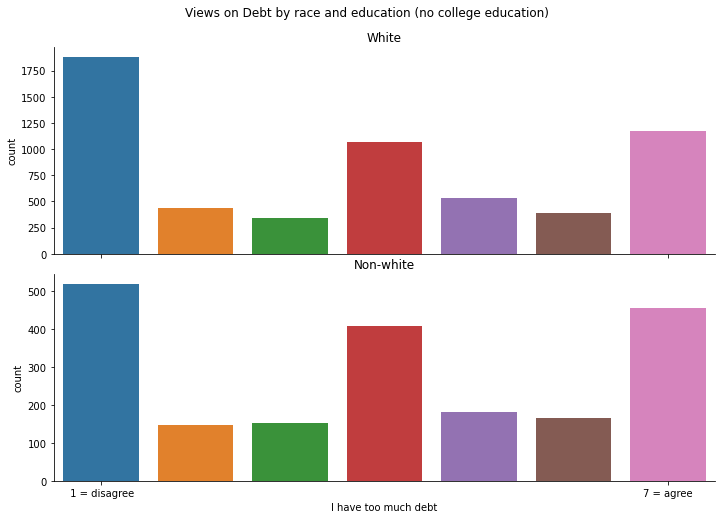

In [244]:
g = sns.catplot(x="G23", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] < 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )
g.fig.set_size_inches(10,7)
#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("I have too much debt")
plt.xticks([0, 6], [' 1 = disagree','7 = agree']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Views on Debt by race and education (no college education)');

In [245]:
contigency= pd.crosstab(df[df['A5_2015'] < 4]['G23'], df[df['A5_2015'] < 4]['A4A_new_w'], normalize='columns')
chi2_contingency(contigency)

(0.013626996487129938,
 0.9999999475506303,
 6,
 array([[0.28990668, 0.28990668],
        [0.0740756 , 0.0740756 ],
        [0.06663165, 0.06663165],
        [0.19155364, 0.19155364],
        [0.0902779 , 0.0902779 ],
        [0.07447199, 0.07447199],
        [0.21308254, 0.21308254]]))

In [246]:
round(df[df['A5_2015'] < 4].groupby(['A4A_new_w'])['G23'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  G23
1          1.0    32.37
           2.0     7.52
           3.0     5.79
           4.0    18.26
           5.0     9.14
           6.0     6.72
           7.0    20.20
2          1.0    25.62
           2.0     7.29
           3.0     7.54
           4.0    20.05
           5.0     8.92
           6.0     8.18
           7.0    22.41
Name: G23, dtype: float64

With those who did not attend college, the pattern looks similar, but the portions are different between the two groups. For white individuals, 32% fully disagreed with the debt statement, 18% were neutral, and 20% fully agreed. With non-white individuals, 26% fully disagreed, 20% were neutral, and 22% fullt agreed.

### TLDR
**As we can see,there is no real differnce in pattern between not finishing college and self perception about debt betweeen white and non white individuals, but a massive difference in proportion. When we look at that education group, we see that non-white individuals perception of their own debt is dispoportionally negative, with a large portion feeling that they have too much debt.**

## View of spending by race and education

In [247]:
Spending_df = df[['NFCSID','J3','A4A_new_w', 'A5_2015']]
J3_df2 = Spending_df.groupby(['A4A_new_w','A5_2015']).J3.value_counts(normalize=True).to_frame(name = 'proportion_J3').reset_index()

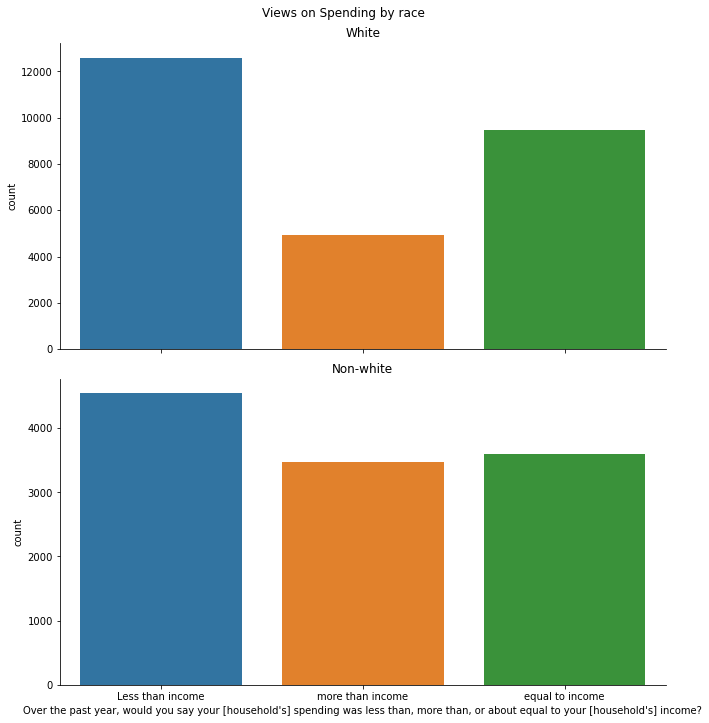

In [248]:
g = sns.catplot(x="J3", 
                row="A4A_new_w", kind = 'count', data=df,
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Over the past year, would you say your [household's] spending was less than, more than, or about equal to your [household's] income?")
plt.xticks([0, 1, 2], ['Less than income','more than income', 'equal to income']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Views on Spending by race');

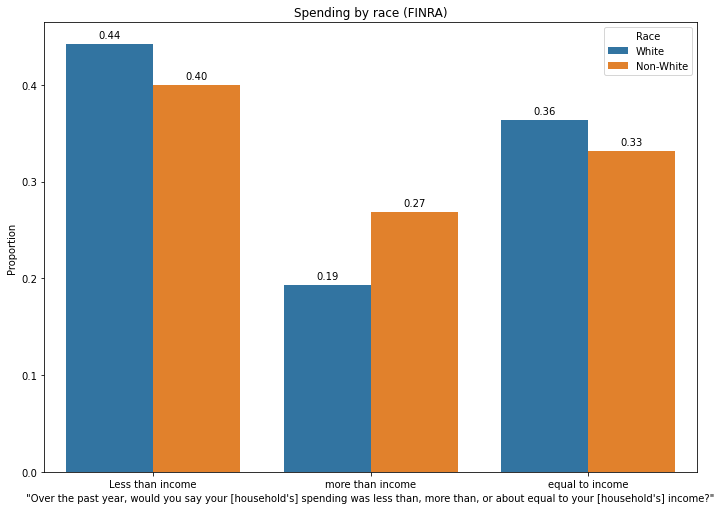

In [249]:
#graphing it

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g= sns.barplot(
    x = 'J3',
    y='proportion_J3',
    data = J3_df2,
    hue='A4A_new_w',
    #order = educ_order,
    ci=None)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_title('Spending by race (FINRA)')
#plt.xticks(rotation = 90);

legend = plt.legend()
legend.set_title("Race")
for t, l in zip(legend.texts,("White", "Non-White")):
    t.set_text(l)

#plt.legend().set_title('check')
#plt.legend();

ax.set(
    xlabel='"Over the past year, would you say your [household\'s] spending was less than, more than, or about equal to your [household\'s] income?"',
    ylabel='Proportion'
    )
plt.xticks([0, 1, 2], ['Less than income','more than income', 'equal to income']);

In [250]:
print('A4A is race, 1 is white, 2 is non-white')
print('J3 is the debt statement, 1 is Less than income, 2 is more than income, and 3 is equal to income \n ')
round(df.groupby(['A4A_new_w'])['J3'].value_counts(normalize = True).sort_index() *100, 2)

A4A is race, 1 is white, 2 is non-white
J3 is the debt statement, 1 is Less than income, 2 is more than income, and 3 is equal to income 
 


A4A_new_w  J3 
1          1.0    46.67
           2.0    18.25
           3.0    35.08
2          1.0    39.16
           2.0    29.88
           3.0    30.96
Name: J3, dtype: float64

When looking at the difference in income spending by race, we see that there is some noticable differences. The largest portion is the same for both white and non-white individuals, with 47% and 39% percent of white and non-white individuals spending less than their income. 18% and 30% of white and non-white individuals spend more than their income, and 35% and 31% of white and non-white individuals spend equal to their income.

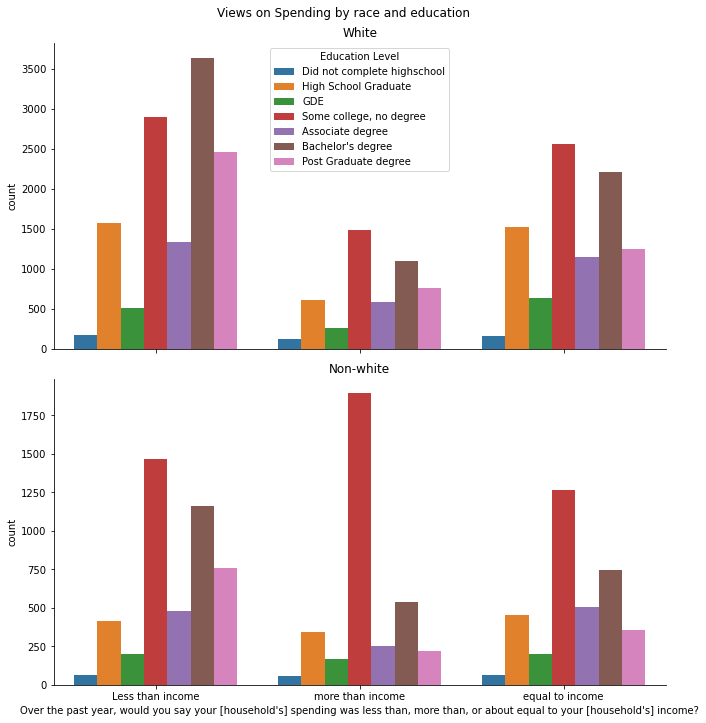

In [251]:
g = sns.catplot(x="J3", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Over the past year, would you say your [household's] spending was less than, more than, or about equal to your [household's] income?")
plt.xticks([0, 1, 2], ['Less than income','more than income', 'equal to income']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Views on Spending by race and education');

Similar to when we looked at self-perception of debt, non-white individuals with some college education but no degree make up an overwhelming portion of individuals who spend more than their income. We can look at this further

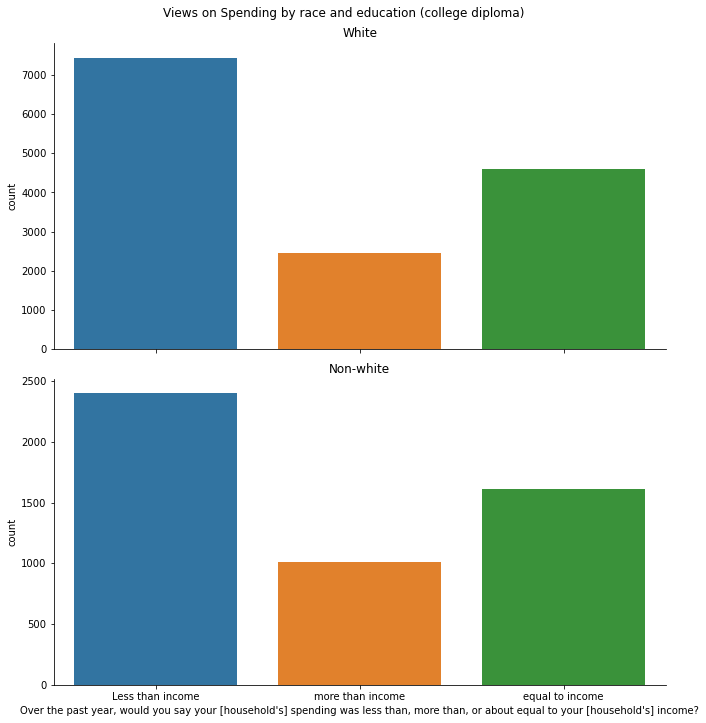

In [252]:
#df[df['A5_2015'] > 4]
g = sns.catplot(x="J3", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] > 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Over the past year, would you say your [household's] spending was less than, more than, or about equal to your [household's] income?")
plt.xticks([0, 1, 2], ['Less than income','more than income', 'equal to income']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Views on Spending by race and education (college diploma)');

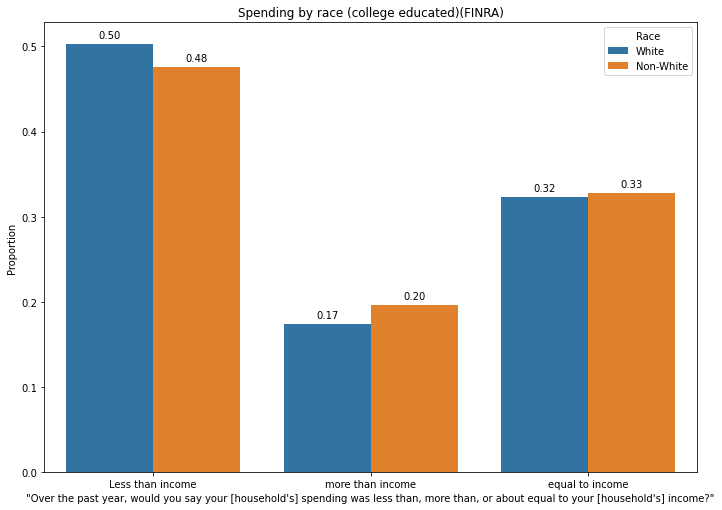

In [253]:
#graphing it

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g= sns.barplot(
    x = 'J3',
    y='proportion_J3',
    data = J3_df2[J3_df2['A5_2015'] > 4],
    hue='A4A_new_w',
    #order = educ_order,
    ci=None)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_title('Spending by race (college educated)(FINRA)')
#plt.xticks(rotation = 90);

legend = plt.legend()
legend.set_title("Race")
for t, l in zip(legend.texts,("White", "Non-White")):
    t.set_text(l)

#plt.legend().set_title('check')
#plt.legend();

ax.set(
    xlabel='"Over the past year, would you say your [household\'s] spending was less than, more than, or about equal to your [household\'s] income?"',
    ylabel='Proportion'
    )
plt.xticks([0, 1, 2], ['Less than income','more than income', 'equal to income']);

In [254]:
contigency= pd.crosstab(df[df['A5_2015'] > 4]['J3'], df[df['A5_2015'] > 4]['A4A_new_w'], normalize= 'columns')
chi2_contingency(contigency)

(0.004229483127425239,
 0.9978874929268271,
 2,
 array([[0.49535417, 0.49535417],
        [0.18535916, 0.18535916],
        [0.31928667, 0.31928667]]))

In [255]:
round(df[df['A5_2015'] > 4].groupby(['A4A_new_w'])['J3'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  J3 
1          1.0    51.34
           2.0    16.90
           3.0    31.76
2          1.0    47.73
           2.0    20.18
           3.0    32.09
Name: J3, dtype: float64

Differences between race are not very apparent when you look at the indiviausl who have a college degrees. Between white and non-white individuals, the percentage of people who spend less than their income is 51% and 47%, respectively. People who spend more than their income is 17% and 20%,  and people who spend equal to their income is 32% for both groups. 

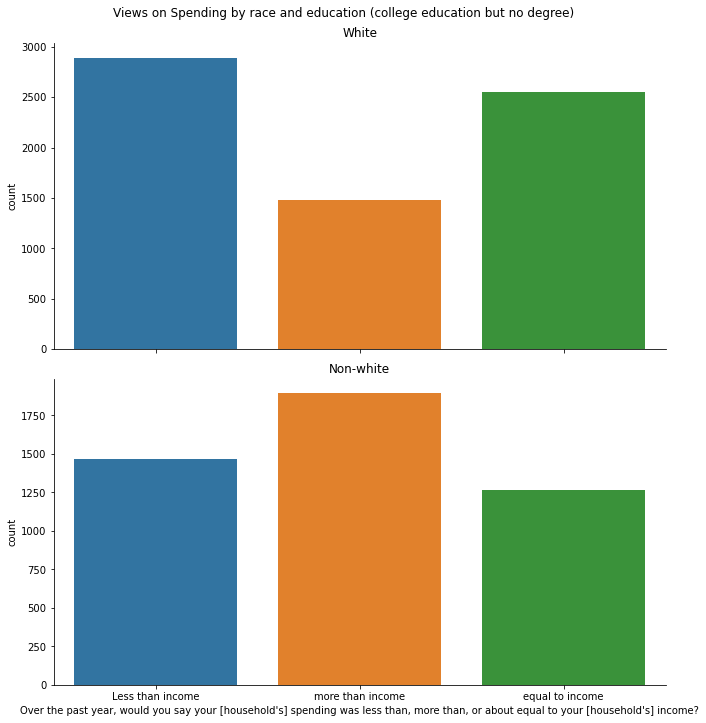

In [256]:
g = sns.catplot(x="J3", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] == 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Over the past year, would you say your [household's] spending was less than, more than, or about equal to your [household's] income?")
plt.xticks([0, 1, 2], ['Less than income','more than income', 'equal to income']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Views on Spending by race and education (college education but no degree)');

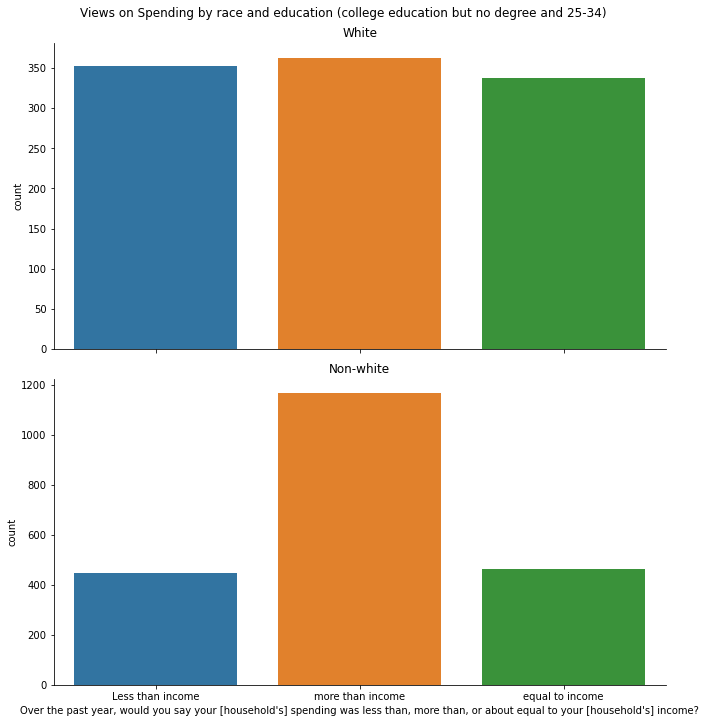

In [257]:
g = sns.catplot(x="J3", 
                row="A4A_new_w", kind = 'count', data=df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)],
                #hue = 'A3Ar_w',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('age')
#new_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Over the past year, would you say your [household's] spending was less than, more than, or about equal to your [household's] income?")
plt.xticks([0, 1, 2], ['Less than income','more than income', 'equal to income']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Views on Spending by race and education (college education but no degree and 25-34)');

In [258]:
contigency= pd.crosstab(df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)]['J3'], df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)]['A4A_new_w'], normalize='columns')
chi2_contingency(contigency)

(0.09501088800313068,
 0.953605281689849,
 2,
 array([[0.27549716, 0.27549716],
        [0.45299898, 0.45299898],
        [0.27150386, 0.27150386]]))

In [259]:
round(df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)].groupby(['A4A_new_w'])['J3'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  J3 
1          1.0    33.52
           2.0    34.47
           3.0    32.00
2          1.0    21.58
           2.0    56.13
           3.0    22.30
Name: J3, dtype: float64

Before even taking age into account, we see some noticable differences, especially in the 'more than income' group. However, once we take age into account, those noticeable differences become massive differences. With regards to white individuals, 34% spent less than income, 34% spent more than income, and 32% spent equal to their income. With regards to non-white individuals, 22% spent less than their income, 56% spent more than their income, and 22% spent equal to their income. The portion of those who spend more than their income is more than double that of those who spend less than or equal to their income!

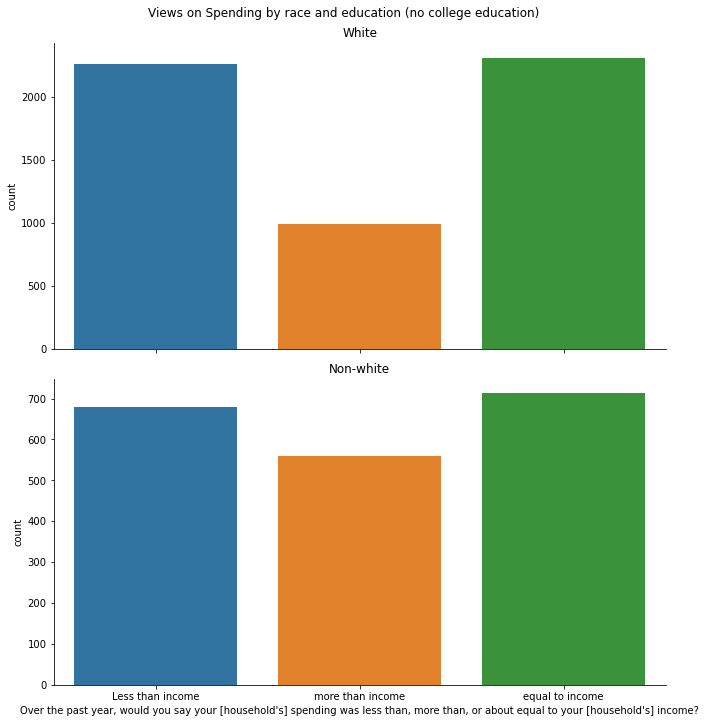

In [260]:
#df[df['A5_2015'] > 4]
g = sns.catplot(x="J3", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] < 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Over the past year, would you say your [household's] spending was less than, more than, or about equal to your [household's] income?")
plt.xticks([0, 1, 2], ['Less than income','more than income', 'equal to income']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Views on Spending by race and education (no college education)');

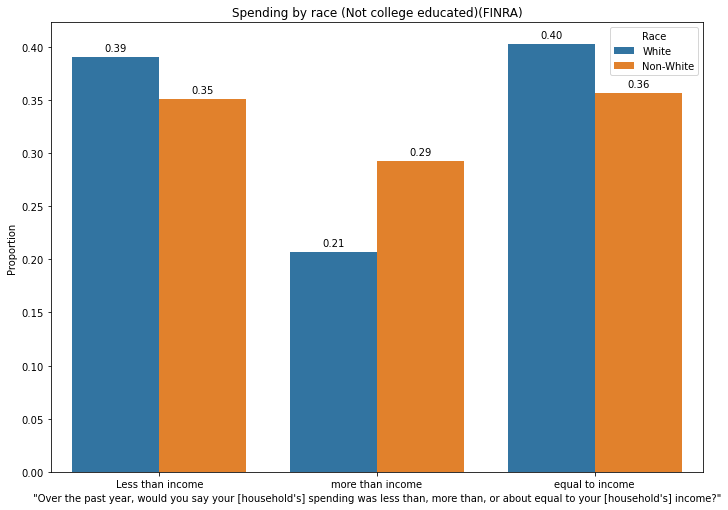

In [261]:
#graphing it

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g= sns.barplot(
    x = 'J3',
    y='proportion_J3',
    data = J3_df2[J3_df2['A5_2015'] < 4],
    hue='A4A_new_w',
    #order = educ_order,
    ci=None)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_title('Spending by race (Not college educated)(FINRA)')
#plt.xticks(rotation = 90);

legend = plt.legend()
legend.set_title("Race")
for t, l in zip(legend.texts,("White", "Non-White")):
    t.set_text(l)

#plt.legend().set_title('check')
#plt.legend();

ax.set(
    xlabel='"Over the past year, would you say your [household\'s] spending was less than, more than, or about equal to your [household\'s] income?"',
    ylabel='Proportion'
    )
plt.xticks([0, 1, 2], ['Less than income','more than income', 'equal to income']);

In [262]:
contigency= pd.crosstab(df[df['A5_2015'] < 4]['J3'], df[df['A5_2015'] < 4]['A4A_new_w'], normalize='columns')
chi2_contingency(contigency)

(0.032843196943449664,
 0.9837125009308659,
 2,
 array([[0.37730018, 0.37730018],
        [0.23264849, 0.23264849],
        [0.39005134, 0.39005134]]))

In [263]:
round(df[df['A5_2015'] < 4].groupby(['A4A_new_w'])['J3'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  J3 
1          1.0    40.64
           2.0    17.86
           3.0    41.50
2          1.0    34.82
           2.0    28.67
           3.0    36.51
Name: J3, dtype: float64

There is a fairly noticable difference between white and non-white individuals who had no college education at all. With regards to white individuals, 41% spent less than income, 18% spent more than income, and 42% spent equal to their income. With regards to non-white individuals, 35 % spent less than their income, 29% spent more than their income, and 37% spent equal to their income.

### TLDR
**We notice major differences between race when looking at individuals with some college experience but no degree. The largest portion of non-white individuals in this education/age group spend more than their income at a higher percentage than any other education/race group. Differences between white and non-white individuals exist with those without any college experience, but not to the same degree. These differences are quite small with individuals with higher education diplomas.**

## View of home ownership by race and education

In [264]:
Home_df = df[['NFCSID','EA_1','A4A_new_w', 'A5_2015']]
EA_1_df2 = Home_df.groupby(['A4A_new_w','A5_2015']).EA_1.value_counts(normalize=True).to_frame(name = 'proportion_EA_1').reset_index()
EA_1_df2.tail(20)

,A4A_new_w,A5_2015,EA_1,proportion_EA_1
8,1,5,1.0,0.680940
9,1,5,2.0,0.319060
10,1,6,1.0,0.749821
11,1,6,2.0,0.250179
12,1,7,1.0,0.830848
13,1,7,2.0,0.169152
14,2,1,2.0,0.786802
15,2,1,1.0,0.213198
16,2,2,2.0,0.588755
17,2,2,1.0,0.411245


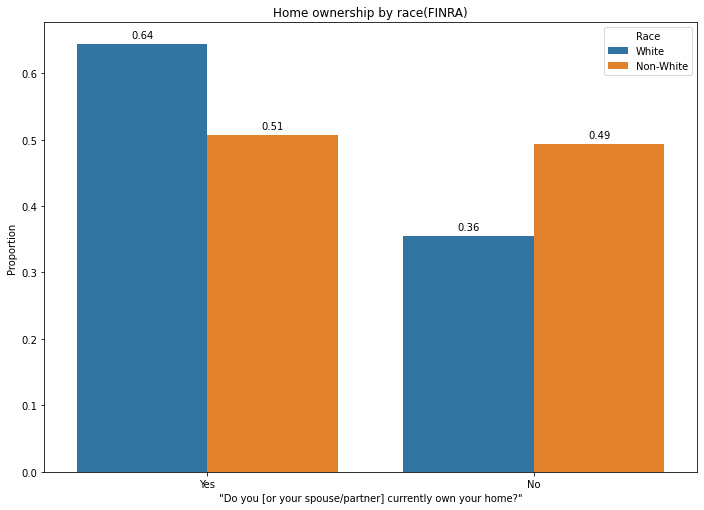

In [265]:
#graphing it

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g= sns.barplot(
    x = 'EA_1',
    y='proportion_EA_1',
    data = EA_1_df2,
    hue='A4A_new_w',
    #order = educ_order,
    ci=None)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_title('Home ownership by race(FINRA)')
#plt.xticks(rotation = 90);

legend = plt.legend()
legend.set_title("Race")
for t, l in zip(legend.texts,("White", "Non-White")):
    t.set_text(l)

#plt.legend().set_title('check')
#plt.legend();

ax.set(
    xlabel='"Do you [or your spouse/partner] currently own your home?"',
    ylabel='Proportion'
    )
plt.xticks([0, 1], ['Yes','No']);

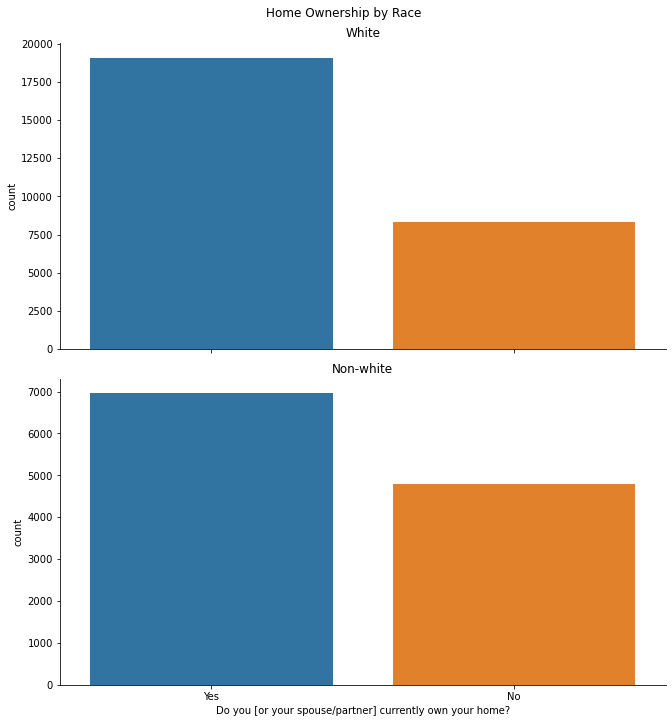

In [266]:
g = sns.catplot(x="EA_1", 
                row="A4A_new_w", kind = 'count', data=df,
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Do you [or your spouse/partner] currently own your home?")
plt.xticks([0, 1], ['Yes','No']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Home Ownership by Race');

In [267]:
print('A4A is race, 1 is white, 2 is non-white')
print('EA_1 is homeownership questions; 1 is yes, 2 is no \n ')
round(df.groupby(['A4A_new_w'])['EA_1'].value_counts(normalize = True).sort_index() *100, 2)

A4A is race, 1 is white, 2 is non-white
EA_1 is homeownership questions; 1 is yes, 2 is no 
 


A4A_new_w  EA_1
1          1.0     69.58
           2.0     30.42
2          1.0     59.23
           2.0     40.77
Name: EA_1, dtype: float64

At first glance there is no noticeable difference between white and non-white individuals. However, there is a 10% difference between the two, with roughly 70% of white individuals owning a gome, and only 60% of non-white individuals owning a home. 

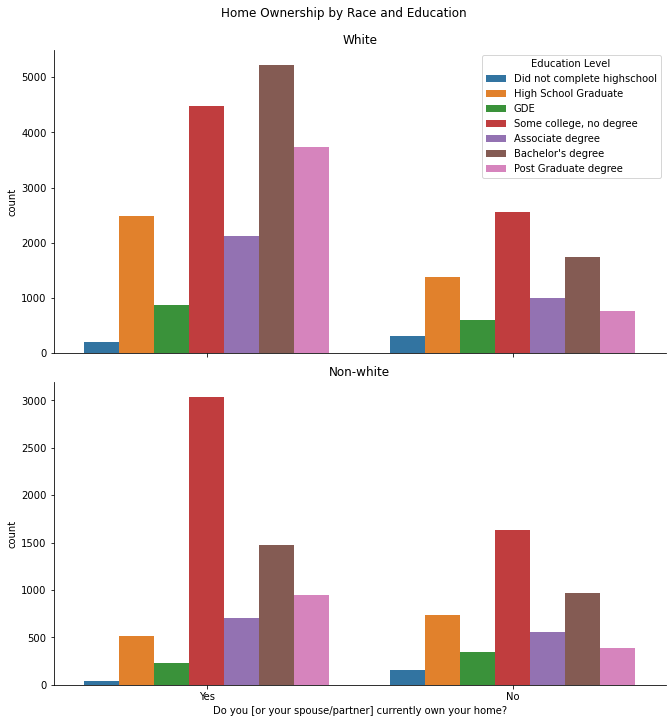

In [268]:
g = sns.catplot(x="EA_1", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Do you [or your spouse/partner] currently own your home?")
plt.xticks([0, 1], ['Yes','No']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Home Ownership by Race and Education');

We notice, however, that for non-white indivudals, a large portion of those who own a home are actually those with college experience. but not a college degree. We can look into these groups further

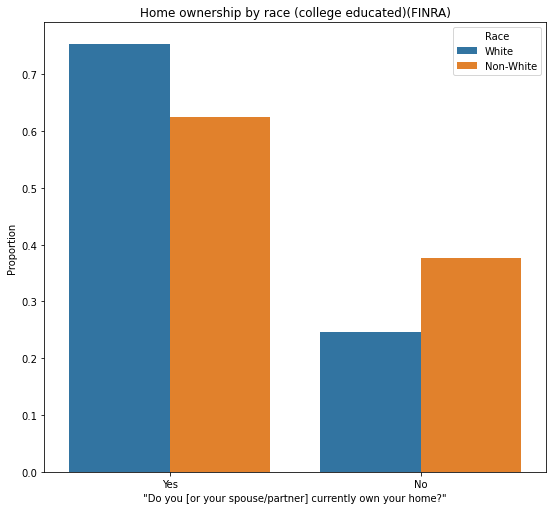

In [383]:
#graphing it
a4_dims = (9, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g= sns.barplot(
    x = 'EA_1',
    y='proportion_EA_1',
    data = EA_1_df2[EA_1_df2['A5_2015'] > 4],
    hue='A4A_new_w',
    #order = educ_order,
    ci=None)

ax.set_title('Home ownership by race (college educated)(FINRA)')
#plt.xticks(rotation = 90);

legend = plt.legend()
legend.set_title("Race")
for t, l in zip(legend.texts,("White", "Non-White")):
    t.set_text(l)

#plt.legend().set_title('check')
#plt.legend();

ax.set(
    xlabel='"Do you [or your spouse/partner] currently own your home?"',
    ylabel='Proportion'
    )
plt.xticks([0, 1], ['Yes','No']);

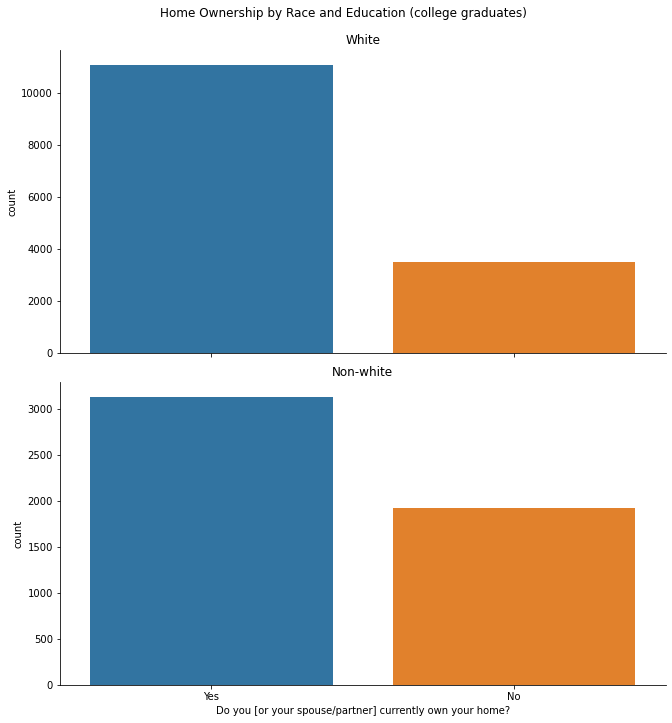

In [270]:
g = sns.catplot(x="EA_1", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] > 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Do you [or your spouse/partner] currently own your home?")
plt.xticks([0, 1], ['Yes','No']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Home Ownership by Race and Education (college graduates)');

In [271]:
contigency= pd.crosstab(df[df['A5_2015'] > 4]['EA_1'], df[df['A5_2015'] > 4]['A4A_new_w'])
chi2_contingency(contigency)

(365.5188462474973,
 1.7696853509716565e-81,
 1,
 array([[10554.30333299,  3655.69666701],
        [ 4019.69666701,  1392.30333299]]))

In [272]:
round(df[df['A5_2015'] > 4].groupby(['A4A_new_w'])['EA_1'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  EA_1
1          1.0     76.01
           2.0     23.99
2          1.0     62.04
           2.0     37.96
Name: EA_1, dtype: float64

When we focus on individuals who did gain a college diploma, we see that the gap between white and non-whtie as grown. 76% of white individuals own a home to 62% of non-white individuals.

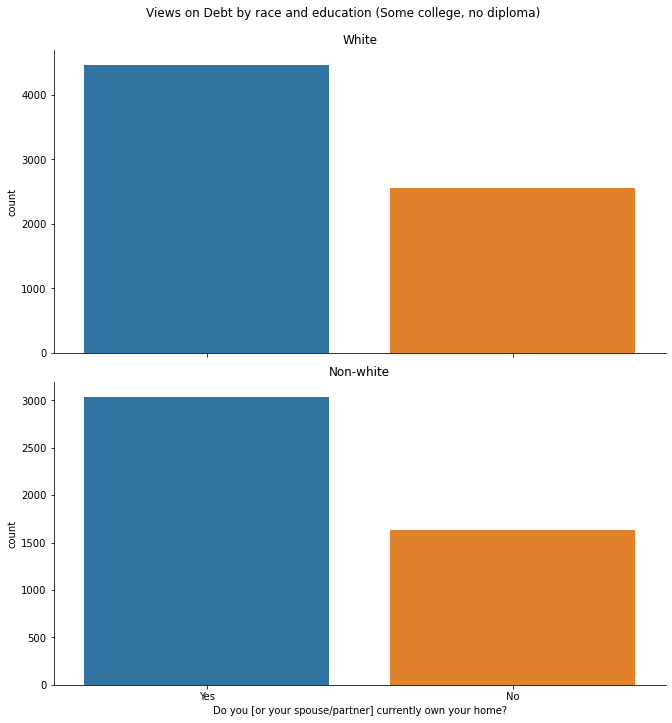

In [273]:
g = sns.catplot(x="EA_1", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] == 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Do you [or your spouse/partner] currently own your home?")
plt.xticks([0, 1], ['Yes','No']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Views on Debt by race and education (Some college, no diploma)');

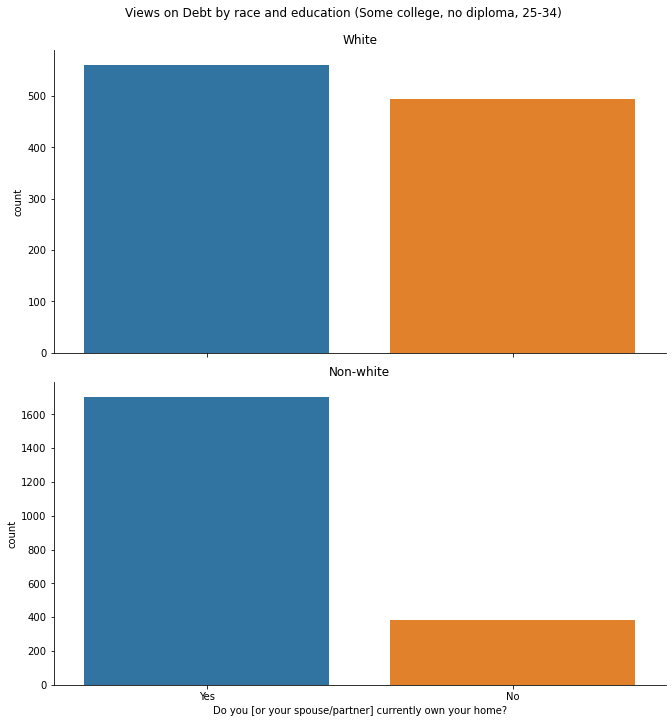

In [274]:
g = sns.catplot(x="EA_1", 
                row="A4A_new_w", kind = 'count', data=df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)],
                #hue = 'A3Ar_w',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('age')
#new_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Do you [or your spouse/partner] currently own your home?")
plt.xticks([0, 1], ['Yes','No']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Views on Debt by race and education (Some college, no diploma, 25-34)');

In [275]:
contigency= pd.crosstab(df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)]['EA_1'], df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)]['A4A_new_w'])
chi2_contingency(contigency)

(278.87799764846363,
 1.3185652067058918e-62,
 1,
 array([[ 759.9888783, 1507.0111217],
        [ 295.0111217,  584.9888783]]))

In [276]:
round(df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)].groupby(['A4A_new_w'])['EA_1'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  EA_1
1          1.0     53.18
           2.0     46.82
2          1.0     81.55
           2.0     18.45
Name: EA_1, dtype: float64

When we look at those who have some college experience but no degree, we see that the distribution is roughly the same. What's interesting is that when we take age into account and focus on the 25-34 year range, however, we find a massive gap, but with non-white individuals who seem to be having issues owning a home. 

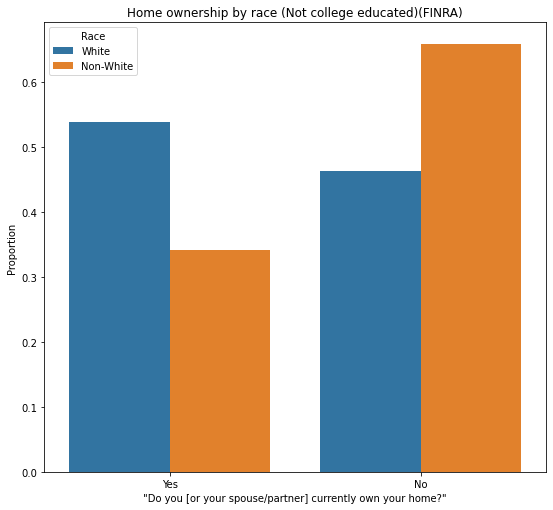

In [384]:
#graphing it
a4_dims = (9, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g= sns.barplot(
    x = 'EA_1',
    y='proportion_EA_1',
    data = EA_1_df2[EA_1_df2['A5_2015'] < 4],
    hue='A4A_new_w',
    #order = educ_order,
    ci=None)


ax.set_title('Home ownership by race (Not college educated)(FINRA)')
#plt.xticks(rotation = 90);

legend = plt.legend()
legend.set_title("Race")
for t, l in zip(legend.texts,("White", "Non-White")):
    t.set_text(l)

#plt.legend().set_title('check')
#plt.legend();

ax.set(
    xlabel='"Do you [or your spouse/partner] currently own your home?"',
    ylabel='Proportion'
    )
plt.xticks([0, 1], ['Yes','No']);

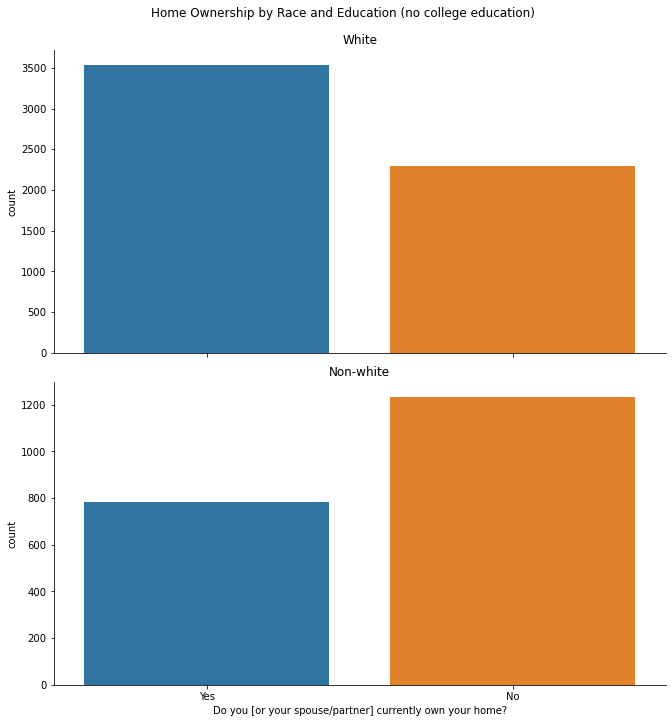

In [278]:
g = sns.catplot(x="EA_1", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] < 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Do you [or your spouse/partner] currently own your home?")
plt.xticks([0, 1], ['Yes','No']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Home Ownership by Race and Education (no college education)');

In [279]:
contigency= pd.crosstab(df[df['A5_2015'] < 4]['EA_1'], df[df['A5_2015'] < 4]['A4A_new_w'])
chi2_contingency(contigency)

(288.9288000297097,
 8.510646588552489e-65,
 1,
 array([[3211.04383282, 1112.95616718],
        [2616.95616718,  907.04383282]]))

In [280]:
round(df[df['A5_2015'] < 4].groupby(['A4A_new_w'])['EA_1'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  EA_1
1          1.0     60.72
           2.0     39.28
2          1.0     38.86
           2.0     61.14
Name: EA_1, dtype: float64

With those who did not attend college, the distribution of homeownership is completely oppoisite between race. Roughly 61% of white individuals in this education group own a home, while 61% of non-white individuals do not own a home

### TLDR
**Home ownership does not seem to help the gap between white and non-white individuals, or at least not how we expected. The home ownership game between race grew with those who have a college degree and those with no college experience. Only with those with some college experience and no degree did we find that the gap had closed (and had moved in the opposite direction)**

## View of savings by race and education (still needs work)

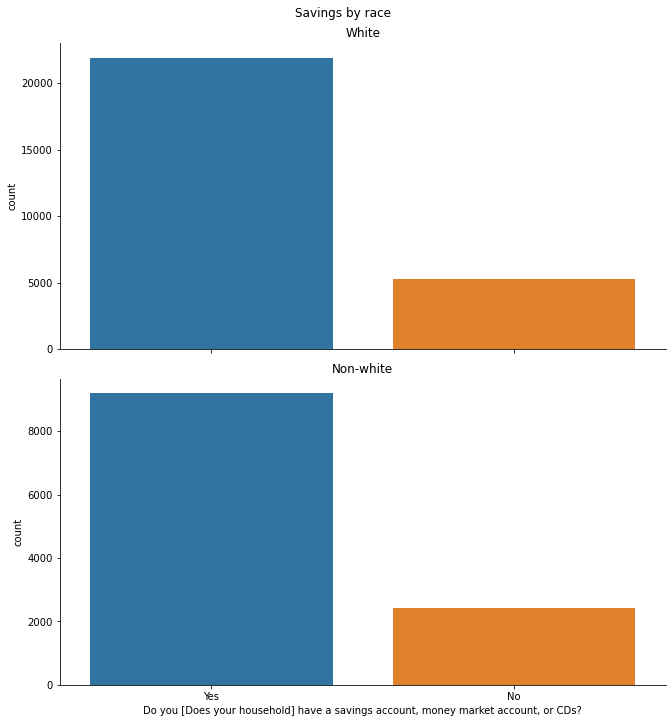

In [281]:
g = sns.catplot(x="B2", 
                row="A4A_new_w", kind = 'count', data=df,
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Do you [Does your household] have a savings account, money market account, or CDs?")
plt.xticks([0, 1], ['Yes','No']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Savings by race');

In [282]:
print('A4A is race, 1 is white, 2 is non-white')
print('B2 is savings, 1 is yes, 2 is no \n ')
round(df.groupby(['A4A_new_w'])['B2'].value_counts(normalize = True).sort_index() *100, 2)

A4A is race, 1 is white, 2 is non-white
B2 is savings, 1 is yes, 2 is no 
 


A4A_new_w  B2 
1          1.0    80.66
           2.0    19.34
2          1.0    79.07
           2.0    20.93
Name: B2, dtype: float64

There seems to be no difference between race, with a large portion of both white and non-white individuals having a savings account (81% and 79%, respectively.)

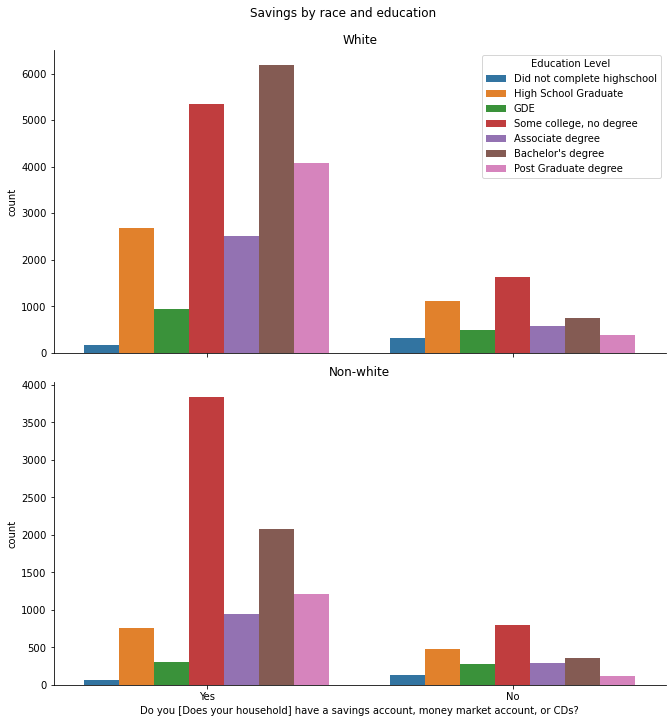

In [283]:
g = sns.catplot(x="B2", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Do you [Does your household] have a savings account, money market account, or CDs?")
plt.xticks([0, 1], ['Yes','No']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Savings by race and education');

We can see that, in general, this holds true between education groups as well.

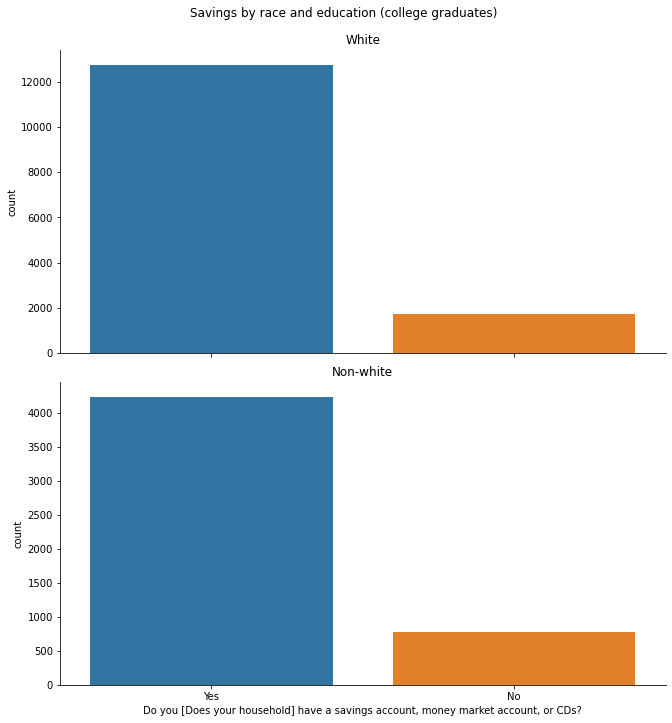

In [284]:
g = sns.catplot(x="B2", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] > 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Do you [Does your household] have a savings account, money market account, or CDs?")
plt.xticks([0, 1], ['Yes','No']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Savings by race and education (college graduates)');

In [285]:
contigency= pd.crosstab(df[df['A5_2015'] > 4]['B2'], df[df['A5_2015'] > 4]['A4A_new_w'])
chi2_contingency(contigency)

(42.71924263108993,
 6.318763906950714e-11,
 1,
 array([[12636.59901473,  4368.40098527],
        [ 1844.40098527,   637.59901473]]))

In [286]:
round(df[df['A5_2015'] > 4].groupby(['A4A_new_w'])['B2'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  B2 
1          1.0    88.18
           2.0    11.82
2          1.0    84.60
           2.0    15.40
Name: B2, dtype: float64

We see that those with a college education are more likely to have a savings account, with 88% of white individuals and 85% of non-white individuals having an account.

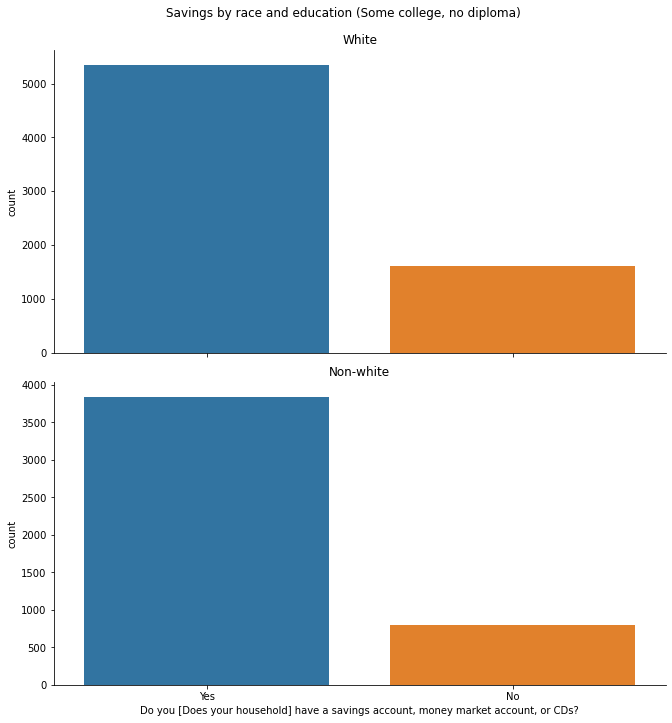

In [287]:
g = sns.catplot(x="B2", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] == 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Do you [Does your household] have a savings account, money market account, or CDs?")
plt.xticks([0, 1], ['Yes','No']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Savings by race and education (Some college, no diploma)');

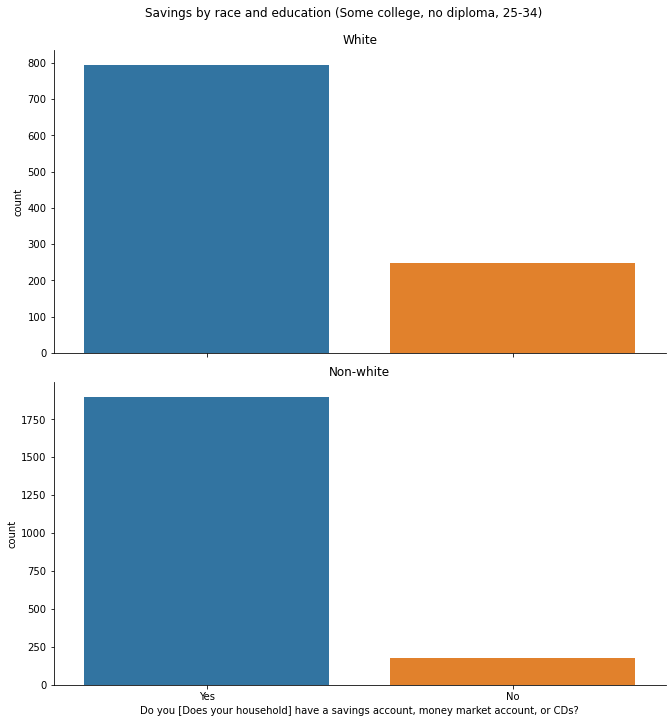

In [288]:
g = sns.catplot(x="B2", 
                row="A4A_new_w", kind = 'count', data=df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)],
                #hue = 'A3Ar_w',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('age')
#new_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Do you [Does your household] have a savings account, money market account, or CDs?")
plt.xticks([0, 1], ['Yes','No']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Savings by race and education (Some college, no diploma, 25-34)');

In [289]:
contigency= pd.crosstab(df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)]['B2'], df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)]['A4A_new_w'])
chi2_contingency(contigency)

(137.89831017442611,
 7.670590067707318e-32,
 1,
 array([[ 901.21630295, 1793.78369705],
        [ 140.78369705,  280.21630295]]))

In [290]:
round(df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)].groupby(['A4A_new_w'])['B2'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  B2 
1          1.0    76.30
           2.0    23.70
2          1.0    91.61
           2.0     8.39
Name: B2, dtype: float64

When looking at those with some college experience but no degree in general, we see the same pattern. We also see it when taking age into account and looking at the 25-34 age group, and in fact see a greater percentage of non-white individuals havings savings accounts than white individuals (92% to 76%)

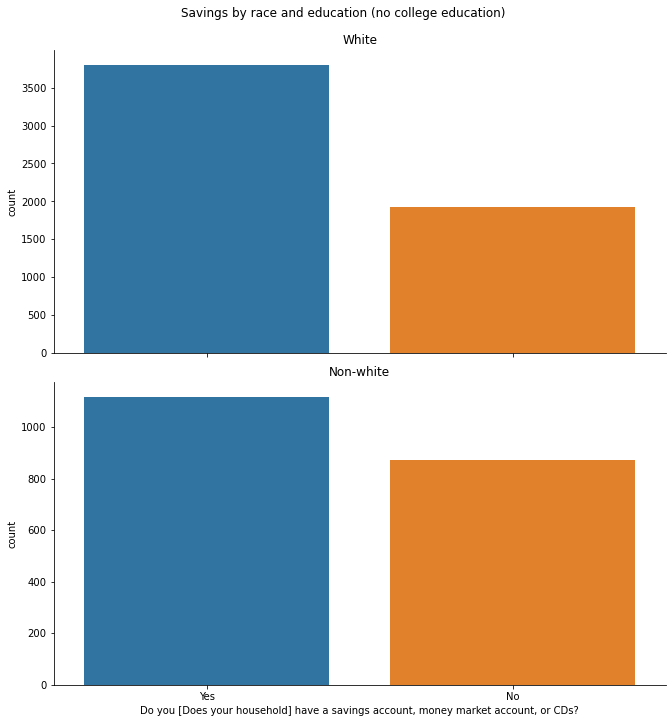

In [291]:
g = sns.catplot(x="B2", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] < 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Do you [Does your household] have a savings account, money market account, or CDs?")
plt.xticks([0, 1], ['Yes','No']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Savings by race and education (no college education)');

In [292]:
contigency= pd.crosstab(df[df['A5_2015'] < 4]['B2'], df[df['A5_2015'] < 4]['A4A_new_w'], normalize='columns')
chi2_contingency(contigency)

(1.7002375714829912,
 0.19225691087540858,
 1,
 array([[0.61301225, 0.61301225],
        [0.38698775, 0.38698775]]))

In [293]:
round(df[df['A5_2015'] < 4].groupby(['A4A_new_w'])['B2'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  B2 
1          1.0    66.39
           2.0    33.61
2          1.0    56.21
           2.0    43.79
Name: B2, dtype: float64

As expected, we see that althought a majority of individuals have a savings account, it is far less than the other two education groups, with 66% of white individuals and 56% of non-white individuals having a savings account. 

### TLDR
**We see that savings seems to be connected to education, and not completely on race. Across the board we see everyone using savings accounts. The some-college-no-degree group continues to act in strange ways, and putting that group aside, the largest difference between race was the 10 point difference with those with no college experience.**

## View of Income by race and education

In [0]:
debt_df = df[['NFCSID','G23','A4A_new_w', 'A5_2015']]
G23_df2 = debt_df.groupby(['A4A_new_w','A5_2015']).G23.value_counts(normalize=True).to_frame(name = 'proportion_G23').reset_index()

In [379]:
income_df = df[['NFCSID','A8','A4A_new_w', 'A5_2015']]
A8_df2 = income_df.groupby(['A4A_new_w','A5_2015']).A8.value_counts(normalize=True).to_frame(name = 'proportion_A8').reset_index()

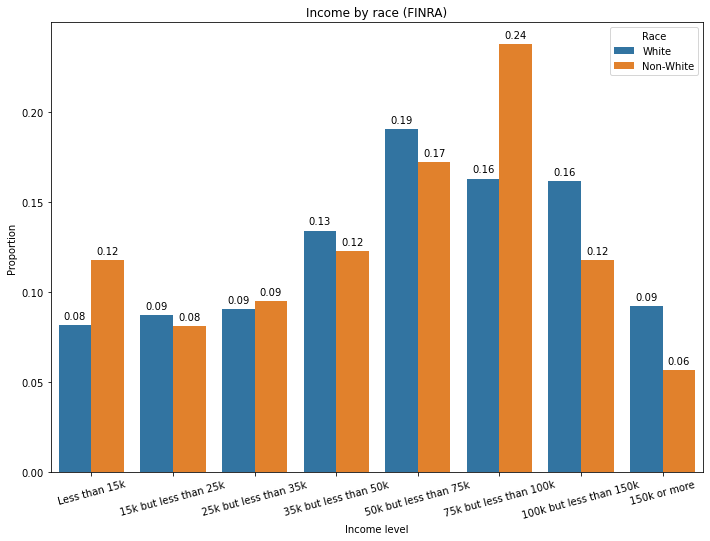

In [295]:
a4_dims = (11.7, 8.27);
fig, ax = plt.subplots(figsize=a4_dims);

g= sns.barplot(
    x = 'A8',
    y='proportion_A8',
    data = A8_df2,
    hue='A4A_new_w',
    #order = educ_order,
    ci=None);

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_title('Income by race (FINRA)');
#plt.xticks(rotation = 90);

legend = plt.legend();
legend.set_title("Race");
for t, l in zip(legend.texts,("White", "Non-White")):
    t.set_text(l);

ax.set(xlabel='Income level', ylabel='Proportion')
plt.xticks(
    [0, 1, 2, 3, 4, 5, 6, 7],
    [
        'Less than 15k',
        '15k but less than 25k',
        '25k but less than 35k',
        '35k but less than 50k',
        '50k but less than 75k',
        '75k but less than 100k',
        '100k but less than 150k',
        '150k or more'
        ]
    );
plt.xticks(rotation=15);

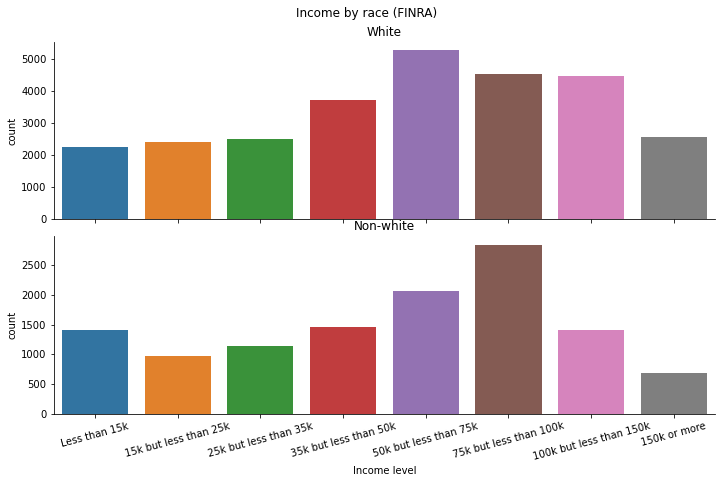

In [296]:
g = sns.catplot(x="A8", 
                row="A4A_new_w", kind = 'count', data=df,
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

g.fig.set_size_inches(10,6);
#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Income level")
plt.xticks(
    [0, 1, 2, 3, 4, 5, 6, 7],
    [
        'Less than 15k',
        '15k but less than 25k',
        '25k but less than 35k',
        '35k but less than 50k',
        '50k but less than 75k',
        '75k but less than 100k',
        '100k but less than 150k',
        '150k or more'
        ]
    );
g.set_xticklabels(rotation=15);


axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Income by race (FINRA)');

In [297]:
print('A4A is race, 1 is white, 2 is non-white')
print('A8 is income, with the following values')
print('1 Less than $15,000')
print('2 At least $15,000 but less than $25,000')
print('3 At least $25,000 but less than $35,000')
print('4 At least $35,000 but less than $50,000')
print('5 At least $50,000 but less than $75,000')
print('6 At least $75,000 but less than $100,000')
print('7 At least $100,000 but less than $150,000')
print('8 $150,000 or more \n\n')

round(df.groupby(['A4A_new_w'])['A8'].value_counts(normalize = True).sort_index() *100, 2)

A4A is race, 1 is white, 2 is non-white
A8 is income, with the following values
1 Less than $15,000
2 At least $15,000 but less than $25,000
3 At least $25,000 but less than $35,000
4 At least $35,000 but less than $50,000
5 At least $50,000 but less than $75,000
6 At least $75,000 but less than $100,000
7 At least $100,000 but less than $150,000
8 $150,000 or more 




A4A_new_w  A8
1          1      8.17
           2      8.70
           3      9.04
           4     13.40
           5     19.03
           6     16.29
           7     16.17
           8      9.21
2          1     11.74
           2      8.10
           3      9.50
           4     12.24
           5     17.22
           6     23.77
           7     11.75
           8      5.67
Name: A8, dtype: float64

There are some differences between race, but the general trend seems to hold. Some interesting things to note: There is a higher proportion of non-white individuals making between 75k and 100k than white individuals (24% to 16%), but in general they fall behind white individuals, with only roughly 58% of individuals making 50k or more, compared to 61% of white individuals. Roughly 29% of non-white individuals make less than 35K, compared to only 26% of white individuals.

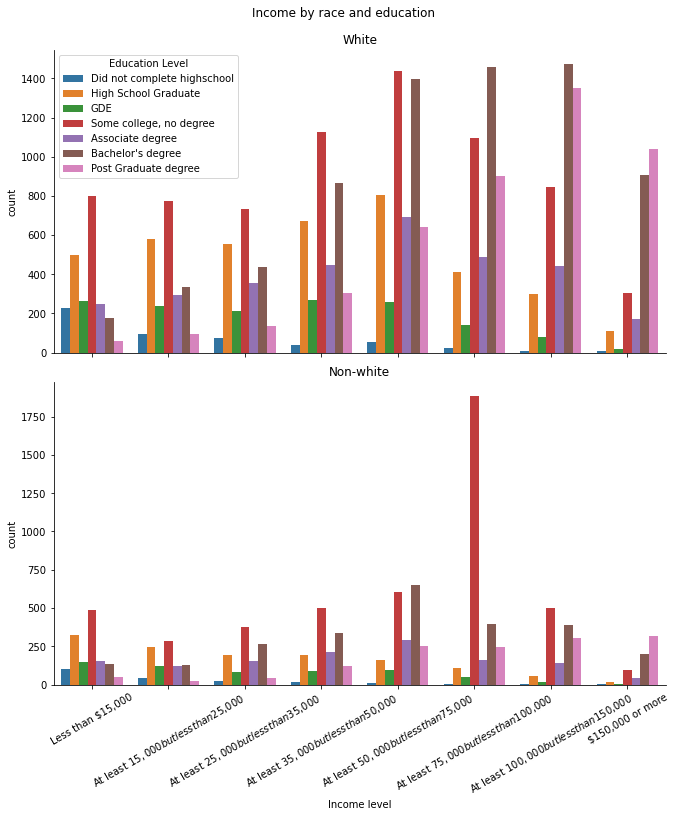

In [298]:
g = sns.catplot(x="A8", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Income level")
plt.xticks(
    [0, 1, 2, 3, 4, 5, 6, 7],
    [
        'Less than $15,000',
        'At least $15,000 but less than $25,000',
        'At least $25,000 but less than $35,000',
        'At least $35,000 but less than $50,000',
        'At least $50,000 but less than $75,000',
        'At least $75,000 but less than $100,000',
        'At least $100,000 but less than $150,000',
        '$150,000 or more'
        ]
    );
g.set_xticklabels(rotation=30)

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Income by race and education');

Again, we see the interesting distribution, especially with non-white individuals with college experience but no degree. They make up a large portion of the 75k to 100k group that was mentioned previously. 

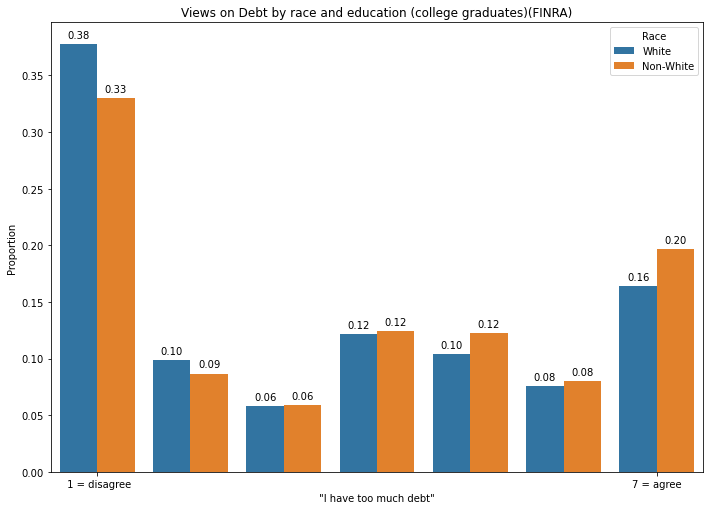

In [376]:
#graphing it

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g= sns.barplot(
    x = 'G23',
    y='proportion_G23',
    data = G23_df2[G23_df2['A5_2015'] > 4],
    hue='A4A_new_w',
    #order = educ_order,
    ci=None)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_title('Views on Debt by race and education (college graduates)(FINRA)')
#plt.xticks(rotation = 90);

legend = plt.legend()
legend.set_title("Race")
for t, l in zip(legend.texts,("White", "Non-White")):
    t.set_text(l)

#plt.legend().set_title('check')
#plt.legend();

ax.set(xlabel='"I have too much debt"', ylabel='Proportion')
plt.xticks([0, 6], [' 1 = disagree','7 = agree']);

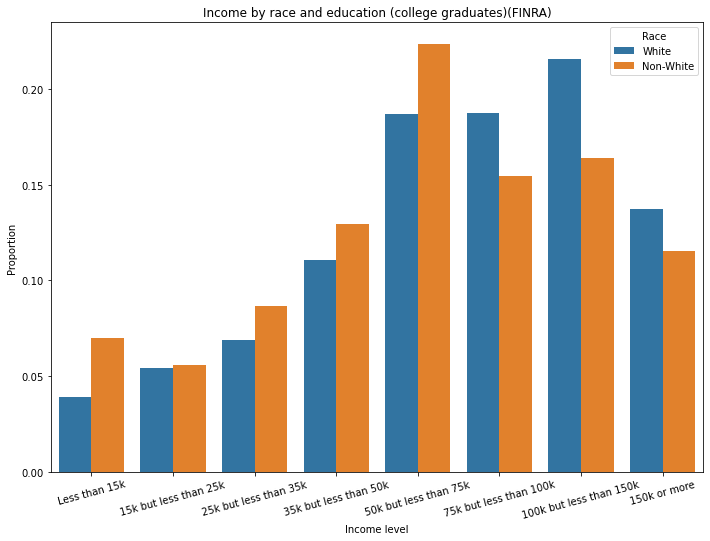

In [380]:
a4_dims = (11.7, 8.27);
fig, ax = plt.subplots(figsize=a4_dims);

g= sns.barplot(
    x = 'A8',
    y='proportion_A8',
    data = A8_df2[A8_df2['A5_2015'] > 4],
    hue='A4A_new_w',
    #order = educ_order,
    ci=None);

ax.set_title('Income by race and education (college graduates)(FINRA)');
#plt.xticks(rotation = 90);

legend = plt.legend();
legend.set_title("Race");
for t, l in zip(legend.texts,("White", "Non-White")):
    t.set_text(l);

ax.set(xlabel='Income level', ylabel='Proportion')
plt.xticks(
    [0, 1, 2, 3, 4, 5, 6, 7],
    [
        'Less than 15k',
        '15k but less than 25k',
        '25k but less than 35k',
        '35k but less than 50k',
        '50k but less than 75k',
        '75k but less than 100k',
        '100k but less than 150k',
        '150k or more'
        ]
    );
plt.xticks(rotation=15);

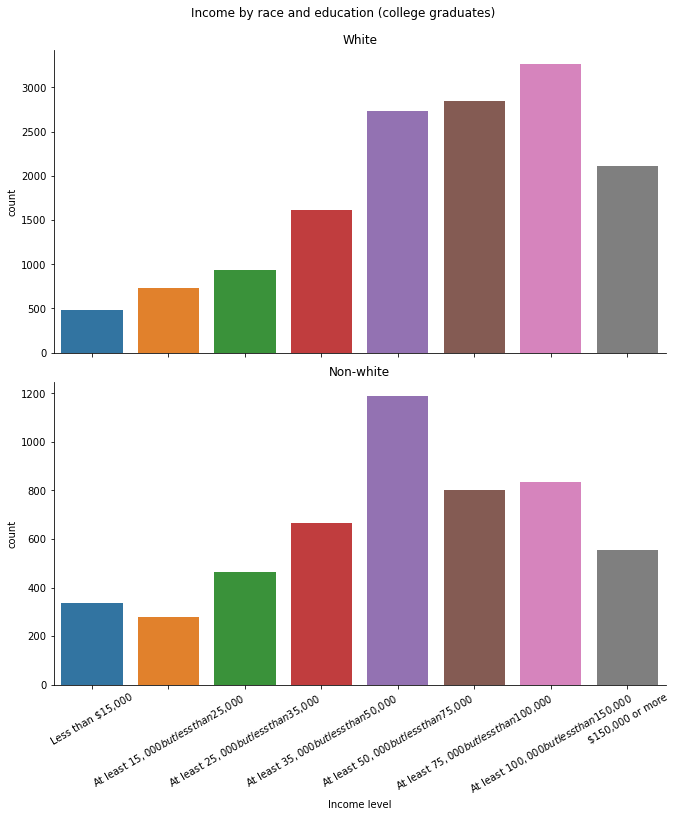

In [300]:
g = sns.catplot(x="A8", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] > 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Income level")
plt.xticks(
    [0, 1, 2, 3, 4, 5, 6, 7],
    [
        'Less than $15,000',
        'At least $15,000 but less than $25,000',
        'At least $25,000 but less than $35,000',
        'At least $35,000 but less than $50,000',
        'At least $50,000 but less than $75,000',
        'At least $75,000 but less than $100,000',
        'At least $100,000 but less than $150,000',
        '$150,000 or more'
        ]
    );
g.set_xticklabels(rotation=30)

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Income by race and education (college graduates)');

In [301]:
contigency= pd.crosstab(df[df['A5_2015'] > 4]['A8'], df[df['A5_2015'] > 4]['A4A_new_w'])
chi2_contingency(contigency)

(323.83151601630635,
 4.889247594763174e-66,
 7,
 array([[ 606.62388466,  211.37611534],
        [ 743.818773  ,  259.181227  ],
        [1036.74839946,  361.25160054],
        [1693.05908151,  589.94091849],
        [2904.82366285, 1012.17633715],
        [2706.81806725,  943.18193275],
        [3037.56898725, 1058.43101275],
        [1981.53914402,  690.46085598]]))

In [302]:
round(df[df['A5_2015'] > 4].groupby(['A4A_new_w'])['A8'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  A8
1          1      3.28
           2      4.94
           3      6.34
           4     10.98
           5     18.55
           6     19.37
           7     22.17
           8     14.38
2          1      6.55
           2      5.40
           3      9.07
           4     13.03
           5     23.18
           6     15.63
           7     16.29
           8     10.85
Name: A8, dtype: float64

When looking at those with college diplomas, we see that the general those with a college degree have a higher distribution of individuals making 50K or more. However, the gap between white and non-white individuals widens: 66% of non-white people make more than 50K, compared to 74% of white individuals. Another interesting thing to note is that the income group with the largest percentage is the 100k to 150k group with white individuals, but the 50 to 75k for non-white individuals. 

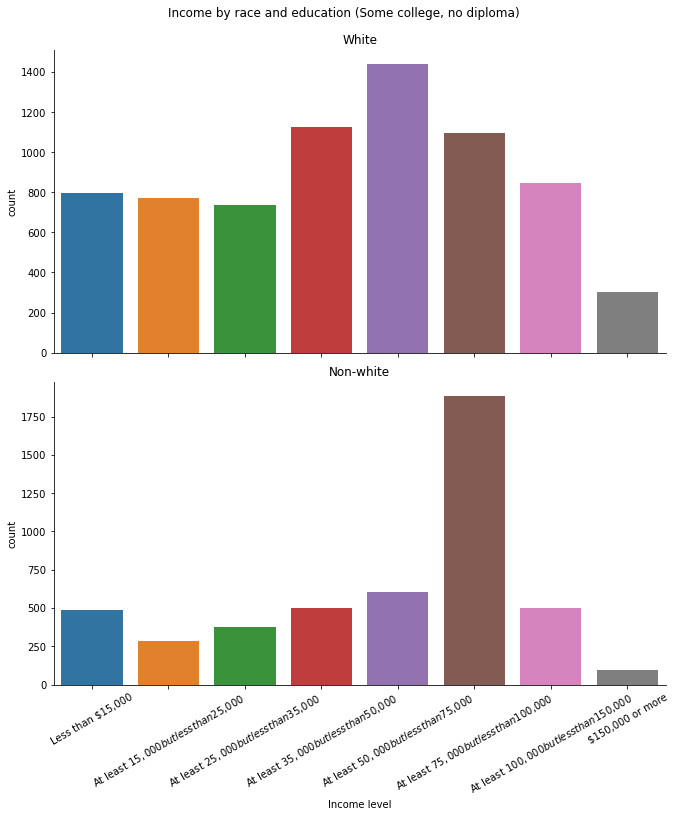

In [303]:
g = sns.catplot(x="A8", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] == 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Income level")
plt.xticks(
    [0, 1, 2, 3, 4, 5, 6, 7],
    [
        'Less than $15,000',
        'At least $15,000 but less than $25,000',
        'At least $25,000 but less than $35,000',
        'At least $35,000 but less than $50,000',
        'At least $50,000 but less than $75,000',
        'At least $75,000 but less than $100,000',
        'At least $100,000 but less than $150,000',
        '$150,000 or more'
        ]
    );
g.set_xticklabels(rotation=30)

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Income by race and education (Some college, no diploma)');

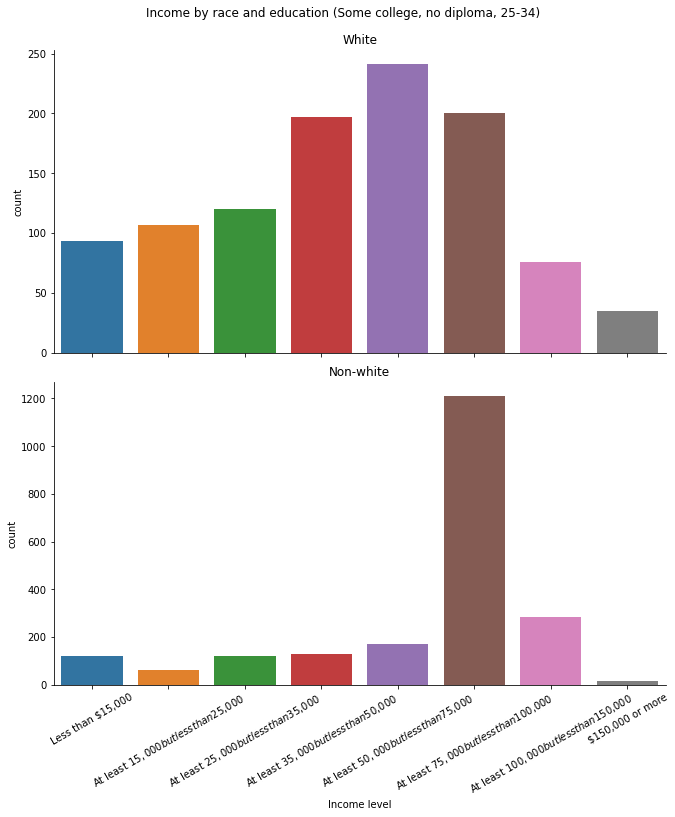

In [304]:
g = sns.catplot(x="A8", 
                row="A4A_new_w", kind = 'count', data=df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)],
                #hue = 'A3Ar_w',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('age')
#new_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Income level")
plt.xticks(
    [0, 1, 2, 3, 4, 5, 6, 7],
    [
        'Less than $15,000',
        'At least $15,000 but less than $25,000',
        'At least $25,000 but less than $35,000',
        'At least $35,000 but less than $50,000',
        'At least $50,000 but less than $75,000',
        'At least $75,000 but less than $100,000',
        'At least $100,000 but less than $150,000',
        '$150,000 or more'
        ]
    );
g.set_xticklabels(rotation=30)

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Income by race and education (Some college, no diploma, 25-34)');

In [305]:
contigency= pd.crosstab(df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)]['A8'], df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)]['A4A_new_w'])
chi2_contingency(contigency)

(621.8723455155408,
 4.7394993127923764e-130,
 7,
 array([[ 71.08698393, 139.91301607],
        [ 56.93696817, 112.06303183],
        [ 80.8572329 , 159.1427671 ],
        [110.16797983, 216.83202017],
        [138.13110621, 271.86889379],
        [474.69933817, 934.30066183],
        [120.94894422, 238.05105578],
        [ 16.17144658,  31.82855342]]))

In [306]:
round(df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)].groupby(['A4A_new_w'])['A8'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  A8
1          1      8.70
           2     10.01
           3     11.23
           4     18.43
           5     22.54
           6     18.71
           7      7.11
           8      3.27
2          1      5.61
           2      2.95
           3      5.70
           4      6.18
           5      8.03
           6     57.46
           7     13.45
           8      0.62
Name: A8, dtype: float64

This is a very interesting group! We see that large majority (57%) of non-white individuals make between 75k and 100k. I'm not to sure why this is the case, but its very different from the white distribution. The distribution of white individuals in this education/age group (no college degree, 25-34) follow a normal distribution, with 23% of individuals making between 50k and 75k. Roughly 48% of white individuals make less than 50k.

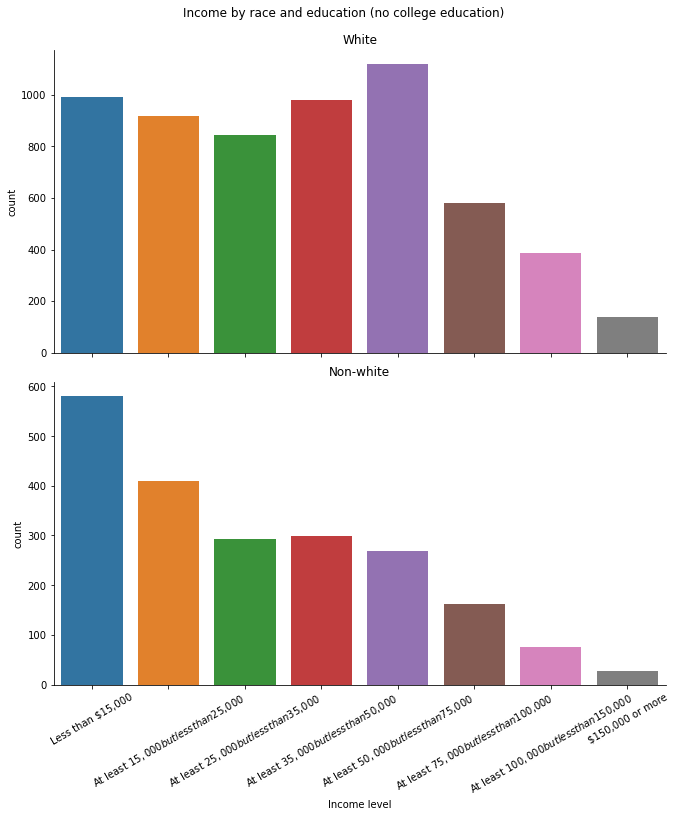

In [307]:
g = sns.catplot(x="A8", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] < 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("Income level")
plt.xticks(
    [0, 1, 2, 3, 4, 5, 6, 7],
    [
        'Less than $15,000',
        'At least $15,000 but less than $25,000',
        'At least $25,000 but less than $35,000',
        'At least $35,000 but less than $50,000',
        'At least $50,000 but less than $75,000',
        'At least $75,000 but less than $100,000',
        'At least $100,000 but less than $150,000',
        '$150,000 or more'
        ]
    );
g.set_xticklabels(rotation=30)

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Income by race and education (no college education)');

In [308]:
contigency= pd.crosstab(df[df['A5_2015'] < 4]['A8'], df[df['A5_2015'] < 4]['A4A_new_w'], normalize='columns')
chi2_contingency(contigency)

(0.05840648069193889,
 0.9999996423108048,
 7,
 array([[0.22019741, 0.22019741],
        [0.1738135 , 0.1738135 ],
        [0.14009628, 0.14009628],
        [0.15301186, 0.15301186],
        [0.15741681, 0.15741681],
        [0.08729225, 0.08729225],
        [0.05012392, 0.05012392],
        [0.01804797, 0.01804797]]))

In [309]:
round(df[df['A5_2015'] < 4].groupby(['A4A_new_w'])['A8'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  A8
1          1     16.62
           2     15.42
           3     14.17
           4     16.47
           5     18.76
           6      9.75
           7      6.48
           8      2.33
2          1     27.42
           2     19.34
           3     13.85
           4     14.14
           5     12.72
           6      7.71
           7      3.55
           8      1.28
Name: A8, dtype: float64

We can more clearly see the disparities between the two groups when looking at those with no college education. Roughly 63% of white individuals make less than 50k, but the largest income group still makes between 50k to 75k (19%). compare that with the 75% of non-white individuals making less than 50K, with their largest income group being those who make less than 15k a year (27%)

### TLDR
**With the exception of the odd behavior regarding non-white individuals with some college experience but no degree, we see that education doesn't change the income gap that exist between the two groups.**

# Analysis (extra)

## Educationa level of parents/guardians vs performance on quiz

In [310]:
df.head()
#PC - percent correct on quiz
#A41 What was the highest level of education completed by the person or any of the people who raised you?
#A4A_new_w Ethnicity 
#

,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A3,A3Ar_w,A3B,A4A_new_w,A5_2015,A6,...,M8,M31,M9,M10,wgt_n2,wgt_d2,wgt_s3,WhenEd,FinEdYN,PC
0,2018010001,48,9,4,2,5,11,1,5,4,...,NaN,NaN,NaN,1.0,0,0,1,0,0,33
1,2018010002,10,5,3,2,2,8,1,6,1,...,NaN,3.0,1.0,NaN,0,2,0,0,0,50
2,2018010003,44,7,3,2,2,8,1,6,1,...,NaN,NaN,1.0,NaN,1,1,0,0,0,33
3,2018010004,10,5,3,2,1,7,1,6,2,...,4.0,4.0,2.0,NaN,0,2,0,3,1,0
4,2018010005,13,8,4,1,2,2,1,6,1,...,NaN,2.0,1.0,NaN,0,0,1,0,0,67


In [311]:
educp_eth_df = df[['NFCSID', 'A4A_new_w', 'A41', 'PC']]

In [312]:
educp = educp_eth_df.groupby('PC').A41.value_counts(normalize=True)
educp = pd.DataFrame(educp.unstack())
educp

A41,1.0,2.0,3.0,4.0,5.0,6.0
PC,,,,,,
0,0.107499,0.379280,0.208062,0.097963,0.150412,0.056784
17,0.082689,0.359029,0.239797,0.091491,0.146439,0.080555
33,0.064770,0.256506,0.328996,0.088075,0.164284,0.097369
50,0.064788,0.276406,0.288072,0.091101,0.182326,0.097307
67,0.064649,0.282889,0.180141,0.106067,0.225939,0.140316
83,0.063912,0.255202,0.161564,0.090071,0.259512,0.169738
100,0.057105,0.226560,0.126959,0.067995,0.294821,0.226560


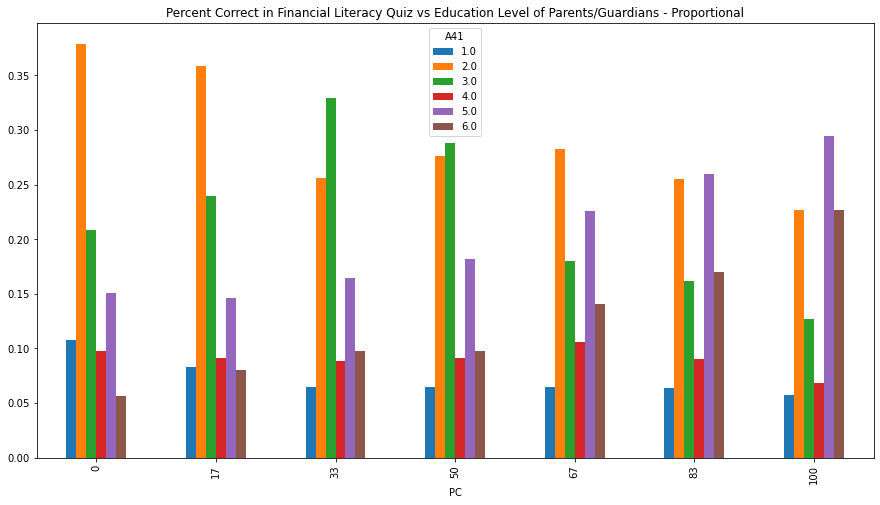

In [313]:
educp.plot.bar(title='Percent Correct in Financial Literacy Quiz vs Education Level of Parents/Guardians - Proportional',  figsize=(15,8));

In [314]:
#Observation: a large proportion of the highest performers on the quiz had parents/guardians who completed a Bachelor's degree

In [315]:
white_educp_eth = educp_eth_df[educp_eth_df['A4A_new_w']==1]
white_educp_eth

,NFCSID,A4A_new_w,A41,PC
0,2018010001,1,NaN,33
1,2018010002,1,5.0,50
2,2018010003,1,3.0,33
3,2018010004,1,5.0,0
4,2018010005,1,5.0,67
...,...,...,...,...
39729,2018037081,1,4.0,17
39730,2018037082,1,2.0,50
39731,2018037083,1,6.0,17
39732,2018037084,1,6.0,83


In [316]:
nonwhite_educp_eth = educp_eth_df[educp_eth_df['A4A_new_w']==2]
nonwhite_educp_eth

,NFCSID,A4A_new_w,A41,PC
38,2018010033,2,3.0,67
45,2018010040,2,5.0,100
48,2018010043,2,2.0,100
49,2018010044,2,4.0,17
52,2018010047,2,5.0,67
...,...,...,...,...
39746,2018037091,2,5.0,67
39747,2018037091,2,5.0,67
39748,2018037091,2,5.0,67
39749,2018037091,2,5.0,67


## Effect of financial education on financial skill score by race (obsolete (?))

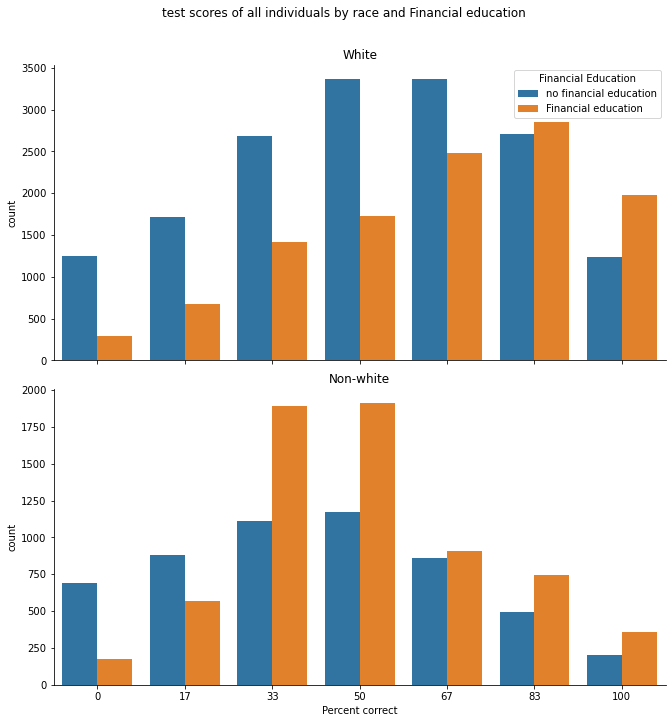

In [317]:
g = sns.catplot(x="PC", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'FinEdYN',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False                
                #palette = 'Set2'
               )

g._legend.set_title('Financial Education')
new_labels = ['no financial education', 'Financial education']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


g.set_axis_labels("Percent correct")
#plt.xticks([0, 1], [' 1 = yes','2 = no']);
axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.9)
g.fig.suptitle('test scores of all individuals by race and Financial education');

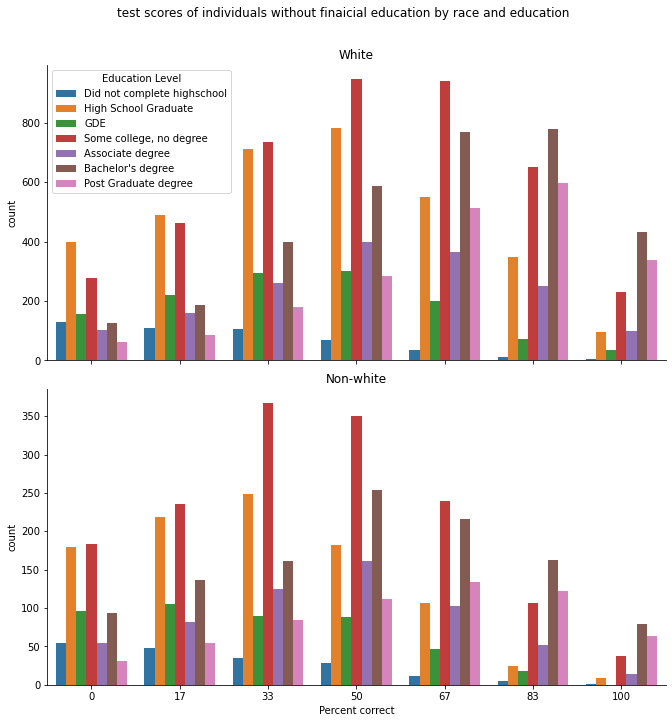

In [318]:
g = sns.catplot(x="PC", 
                row="A4A_new_w", kind = 'count', data=df[df['FinEdYN'] == 0],
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False                
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


g.set_axis_labels("Percent correct")
#plt.xticks([0, 1], [' 1 = yes','2 = no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.9)
g.fig.suptitle('test scores of individuals without finaicial education by race and education');

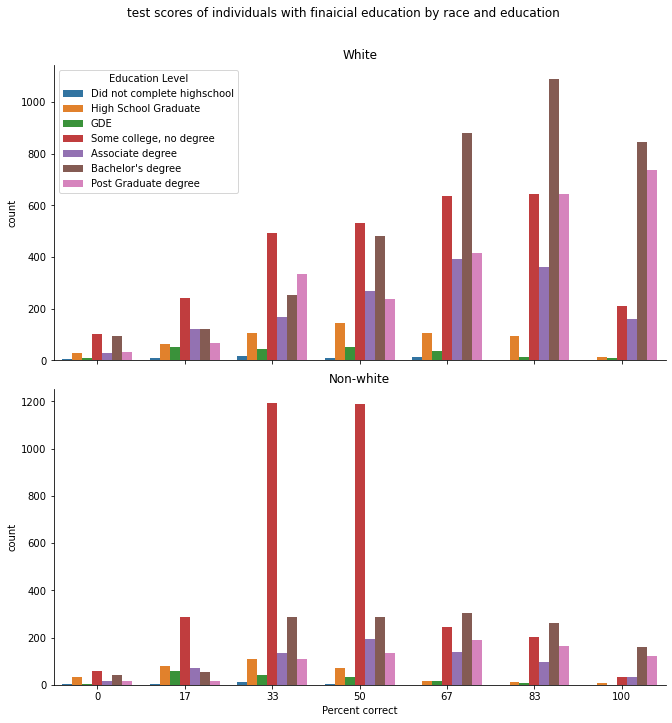

In [319]:
g = sns.catplot(x="PC", 
                row="A4A_new_w", kind = 'count', data=df[df['FinEdYN'] == 1],
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False                
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


g.set_axis_labels("Percent correct")
#plt.xticks([0, 1], [' 1 = yes','2 = no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=0.9)
g.fig.suptitle('test scores of individuals with finaicial education by race and education');

## Mortage payments by education and race

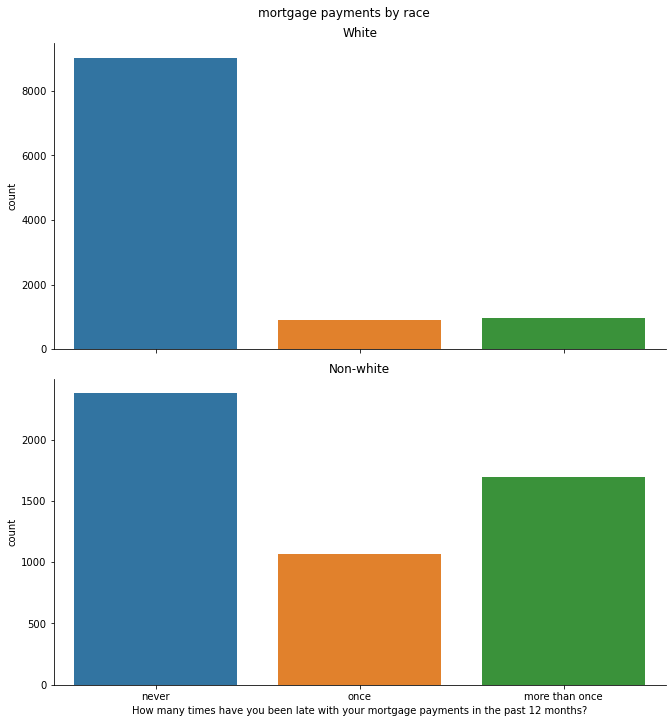

In [320]:
g = sns.catplot(x="E15_2015", 
                row="A4A_new_w", kind = 'count', data=df,
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How many times have you been late with your mortgage payments in the past 12 months?")
plt.xticks([0, 1, 2], ['never','once', 'more than once']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('mortgage payments by race');

In [321]:
print('A4A is race, 1 is white, 2 is non-white')
print('E15_2015 is the mortgage question, 1 is never, 2 is once, and 3 is more than once \n ')
round(df.groupby(['A4A_new_w'])['E15_2015'].value_counts(normalize = True).sort_index() *100, 2)

A4A is race, 1 is white, 2 is non-white
E15_2015 is the mortgage question, 1 is never, 2 is once, and 3 is more than once 
 


A4A_new_w  E15_2015
1          1.0         82.76
           2.0          8.28
           3.0          8.97
2          1.0         46.30
           2.0         20.74
           3.0         32.96
Name: E15_2015, dtype: float64

In general, it seems that non-white individuals have a harder time paying their mortgage on time. For white individuals, 83% never had a late payment, 8% were late once, and 9% payed late more than once. For non-white individuals, 46% never had a late payment, 21% were late once, and 33% payed late more than once.

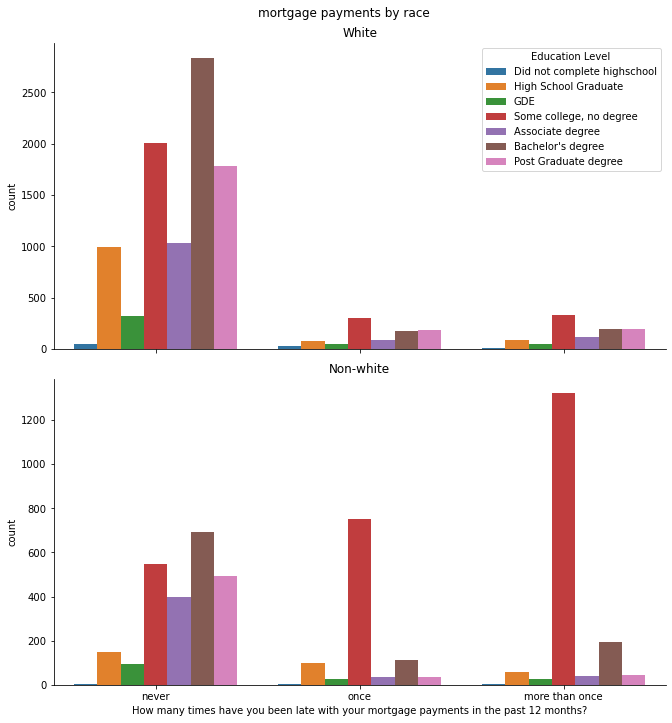

In [322]:
g = sns.catplot(x="E15_2015", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How many times have you been late with your mortgage payments in the past 12 months?")
plt.xticks([0, 1, 2], ['never','once', 'more than once']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('mortgage payments by race');

We can see that a huge portion of those that pay the mortgage late more than once had some college and no degree. We can look into this further

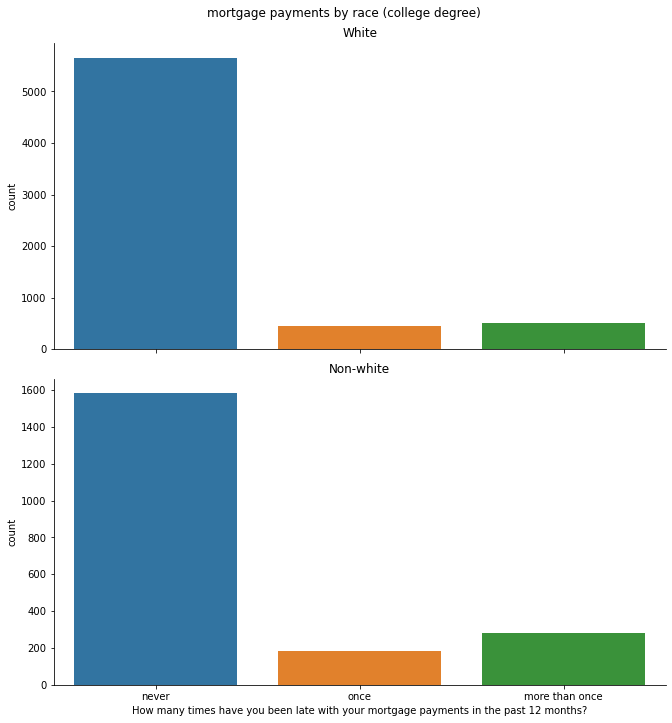

In [323]:
g = sns.catplot(x="E15_2015", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] > 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How many times have you been late with your mortgage payments in the past 12 months?")
plt.xticks([0, 1, 2], ['never','once', 'more than once']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('mortgage payments by race (college degree)');

In [324]:
round(df[df['A5_2015'] > 4].groupby(['A4A_new_w'])['E15_2015'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  E15_2015
1          1.0         85.58
           2.0          6.76
           3.0          7.65
2          1.0         77.21
           2.0          9.08
           3.0         13.71
Name: E15_2015, dtype: float64

For those with a college degree, the difference isn't too pronounced. For white individuals, 86% never had a late payment, 7% were late once, and 8% payed late more than once. For non-white individuals, 77% never had a late payment, 9% were late once, and 14% payed late more than once.

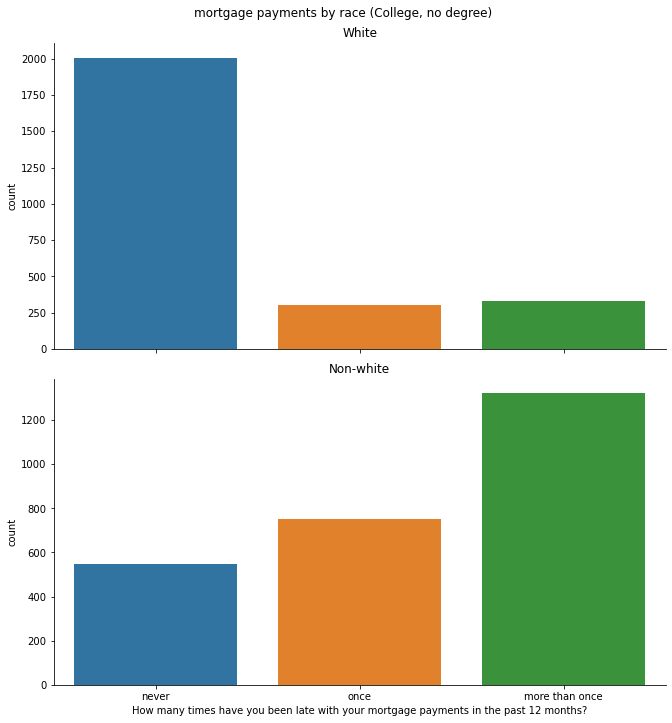

In [325]:
g = sns.catplot(x="E15_2015", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] == 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How many times have you been late with your mortgage payments in the past 12 months?")
plt.xticks([0, 1, 2], ['never','once', 'more than once']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('mortgage payments by race (College, no degree)');

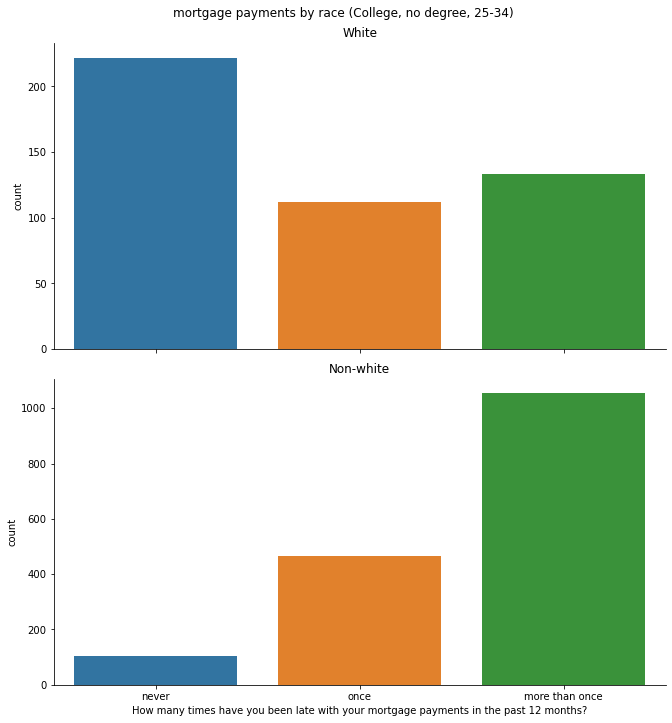

In [326]:
g = sns.catplot(x="E15_2015", 
                row="A4A_new_w", kind = 'count', data=df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)],
                #hue = 'A3Ar_w',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('age')
#new_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How many times have you been late with your mortgage payments in the past 12 months?")
plt.xticks([0, 1, 2], ['never','once', 'more than once']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('mortgage payments by race (College, no degree, 25-34)');

In [327]:
round(df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)].groupby(['A4A_new_w'])['E15_2015'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  E15_2015
1          1.0         47.54
           2.0         23.98
           3.0         28.48
2          1.0          6.46
           2.0         28.72
           3.0         64.82
Name: E15_2015, dtype: float64

Again, we see that, when looking at this particular group, we get very different results than we do for other groups. For white individuals, 48% never had a late payment, 24% were late once, and 28% payed late more than once. For non-white individuals, 6% never had a late payment, 29% were late once, and 65% payed late more than once. The major differences we see are with the proportions of those who never were late and those who were late more than once. 

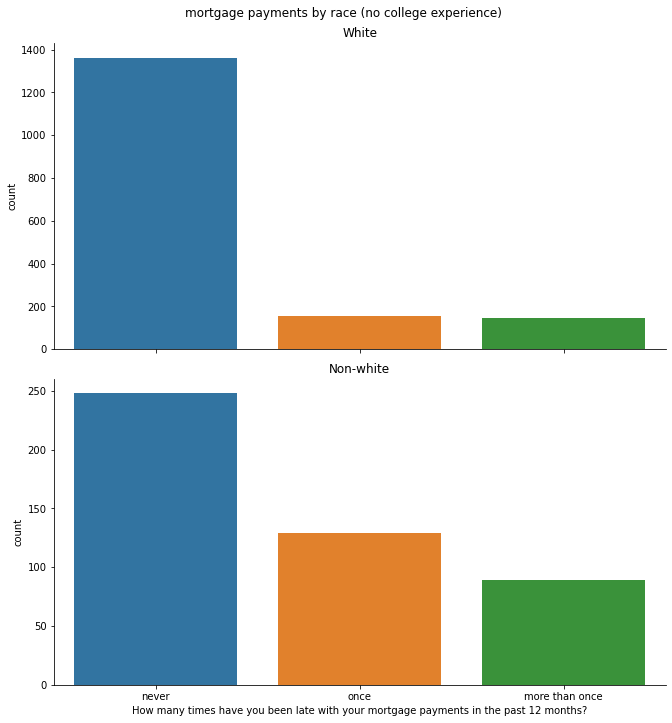

In [328]:
g = sns.catplot(x="E15_2015", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] < 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How many times have you been late with your mortgage payments in the past 12 months?")
plt.xticks([0, 1, 2], ['never','once', 'more than once']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('mortgage payments by race (no college experience)');

In [329]:
round(df[df['A5_2015'] < 4].groupby(['A4A_new_w'])['E15_2015'].value_counts(normalize = True).sort_index() *100, 2)

A4A_new_w  E15_2015
1          1.0         82.06
           2.0          9.27
           3.0          8.67
2          1.0         53.22
           2.0         27.68
           3.0         19.10
Name: E15_2015, dtype: float64

With those with no college education, we see that the general shape of the distribution is the same, but the maginitudes are different. For white individuals, 82% never had a late payment, 9% were late once, and 9% payed late more than once. For non-white individuals, 53% never had a late payment, 28% were late once, and 19% payed late more than once.

### TLDR
**Education has a strong connection with mortgage payment habits. Those who  had a higher education were not so different between raced, but the difference between race does become more prevelant in other education groups, especially with those who had some college education but no degree.**

## credit card habits (whether they pay in full or not) by race and education

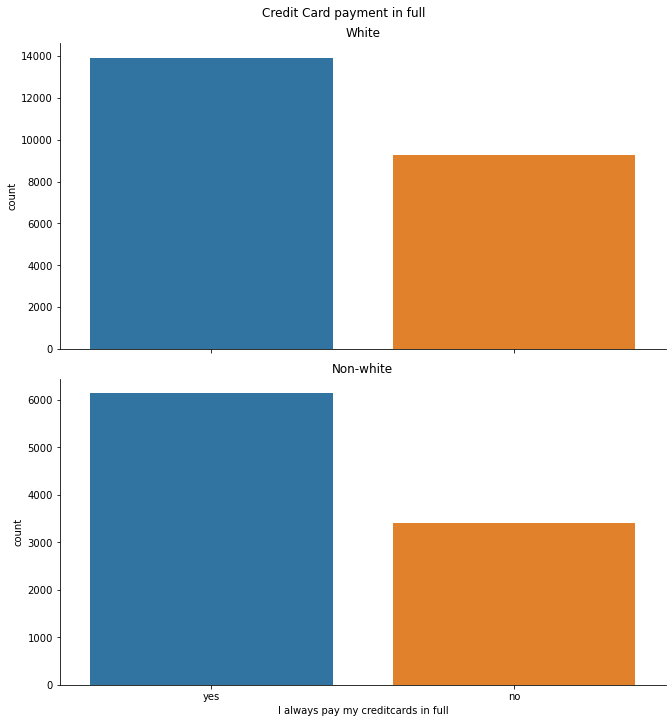

In [330]:
g = sns.catplot(x="F2_1", 
                row="A4A_new_w", kind = 'count', data=df,
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("I always pay my creditcards in full")
plt.xticks([0, 1], ['yes','no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Credit Card payment in full');

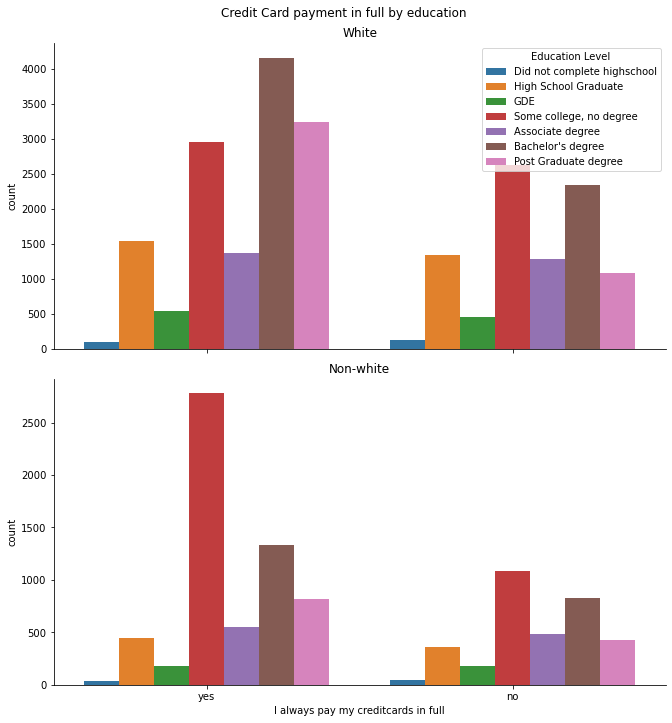

In [331]:
g = sns.catplot(x="F2_1", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("I always pay my creditcards in full")
plt.xticks([0, 1], ['yes','no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Credit Card payment in full by education');

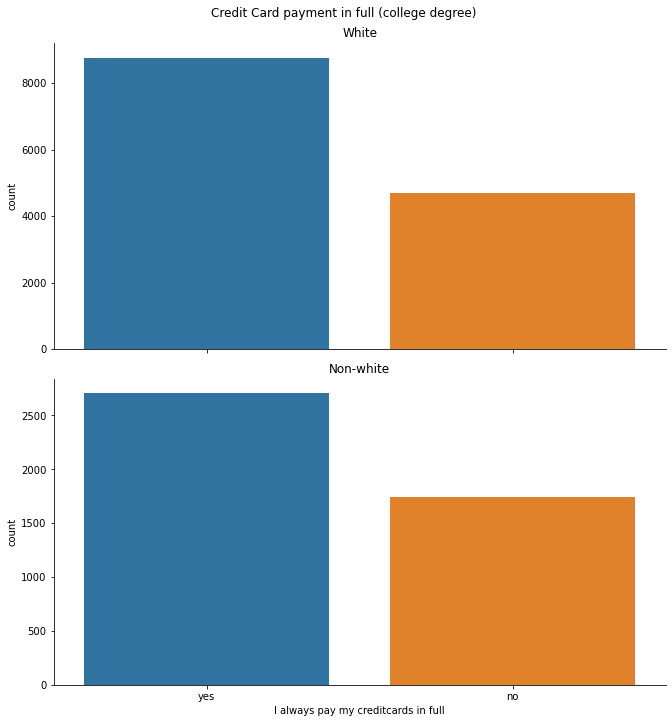

In [332]:
g = sns.catplot(x="F2_1", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] > 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("I always pay my creditcards in full")
plt.xticks([0, 1], ['yes','no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Credit Card payment in full (college degree)');

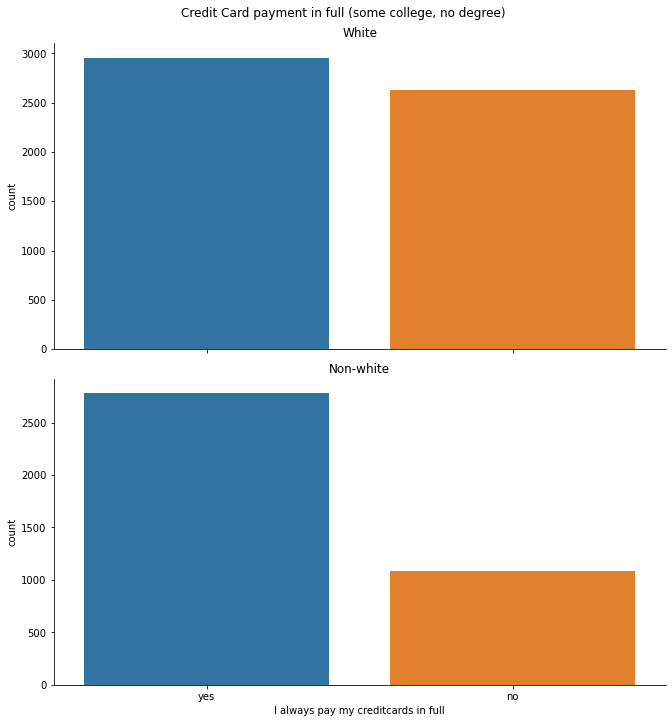

In [333]:
g = sns.catplot(x="F2_1", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015']== 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("I always pay my creditcards in full")
plt.xticks([0, 1], ['yes','no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Credit Card payment in full (some college, no degree)');

wtf


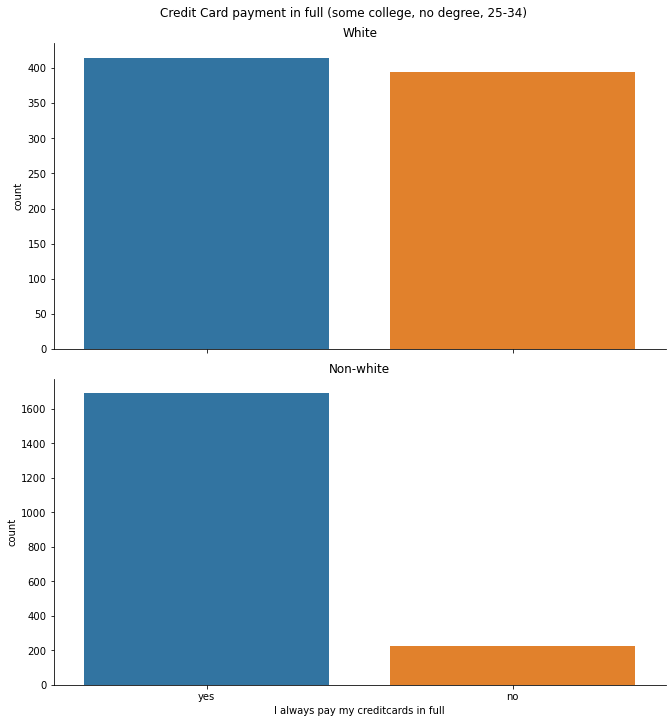

In [334]:
g = sns.catplot(x="F2_1", 
                row="A4A_new_w", kind = 'count', data=df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("I always pay my creditcards in full")
plt.xticks([0, 1], ['yes','no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Credit Card payment in full (some college, no degree, 25-34)');


print('wtf')

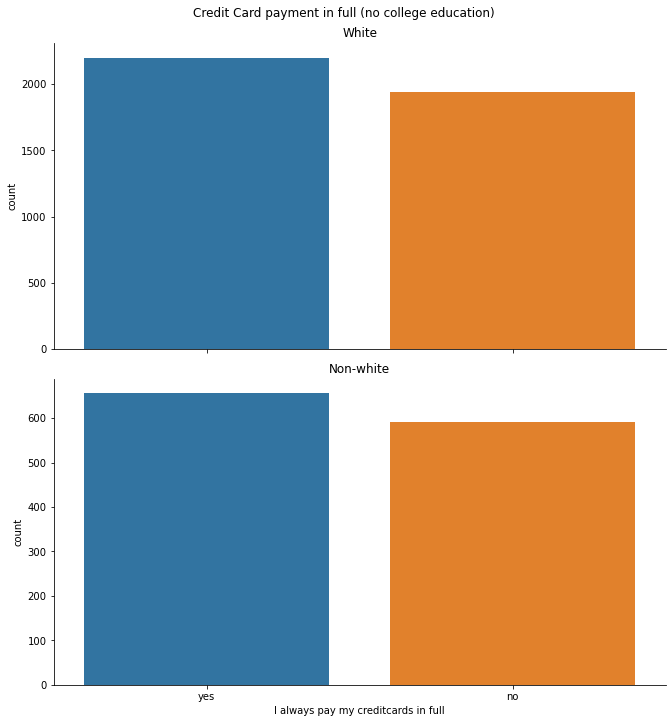

In [335]:
g = sns.catplot(x="F2_1", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] < 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("I always pay my creditcards in full")
plt.xticks([0, 1], ['yes','no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Credit Card payment in full (no college education)');

### TLDR
**haven't done full write up for this sections but, it seems that in general there is no major difference between white and non-white between groups except for one group. When looking at those with some college expereince but no degree in the 25-34 age range, we see that non-white people have a higher portion of people who pay their credit card bills in full than white people by a large amount.**

## Credit card habits (late fees) by race and education

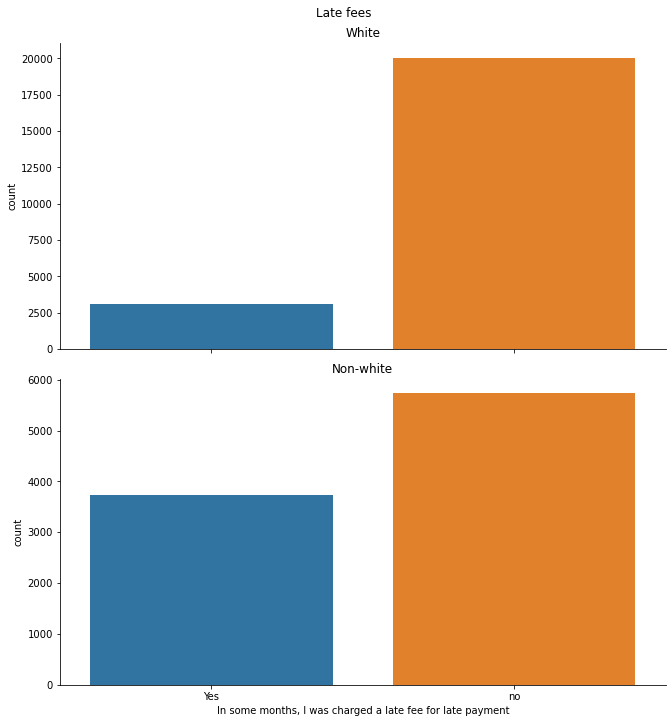

In [336]:
g = sns.catplot(x="F2_4", 
                row="A4A_new_w", kind = 'count', data=df,
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("In some months, I was charged a late fee for late payment")
plt.xticks([0, 1], ['Yes','no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Late fees');

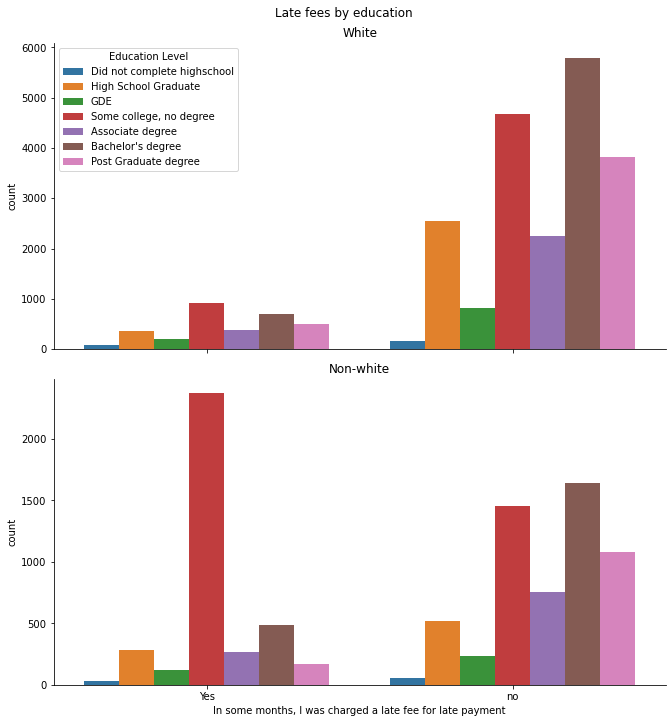

In [337]:
g = sns.catplot(x="F2_4", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("In some months, I was charged a late fee for late payment")
plt.xticks([0, 1], ['Yes','no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Late fees by education');

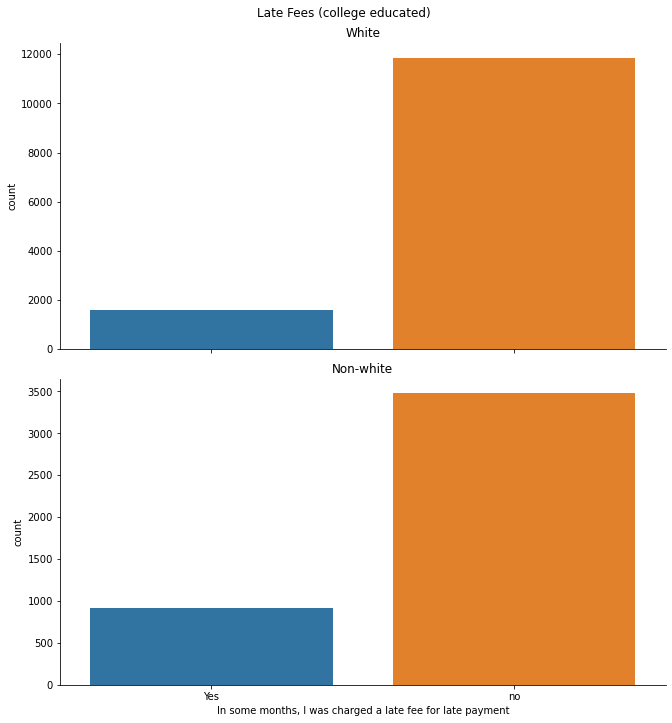

In [338]:
g = sns.catplot(x="F2_4", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] > 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("In some months, I was charged a late fee for late payment")
plt.xticks([0, 1], ['Yes','no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Late Fees (college educated)');

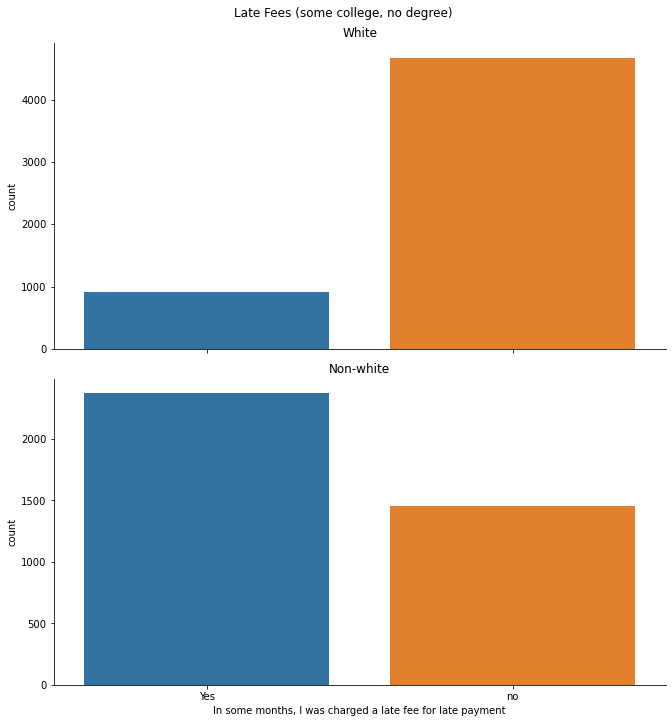

In [339]:
g = sns.catplot(x="F2_4", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] == 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("In some months, I was charged a late fee for late payment")
plt.xticks([0, 1], ['Yes','no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Late Fees (some college, no degree)');

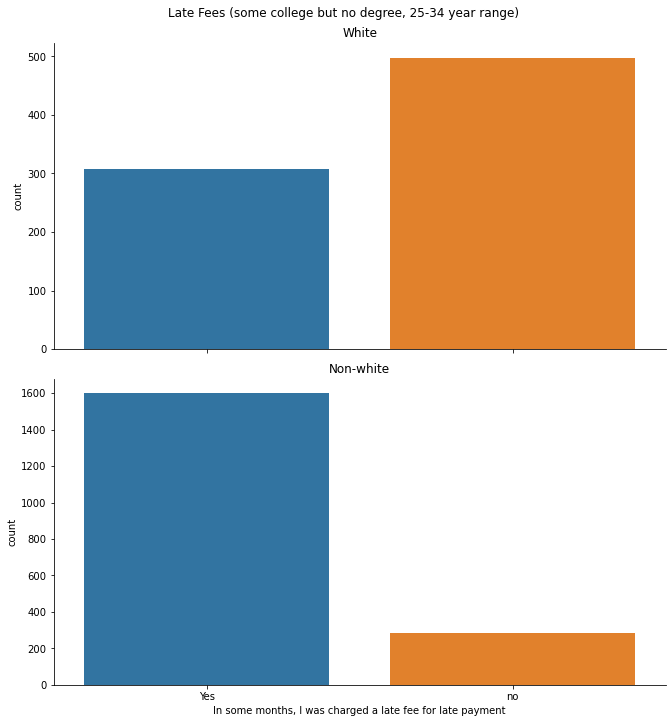

In [340]:
g = sns.catplot(x="F2_4", 
                row="A4A_new_w", kind = 'count', data=df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("In some months, I was charged a late fee for late payment")
plt.xticks([0, 1], ['Yes','no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Late Fees (some college but no degree, 25-34 year range)');

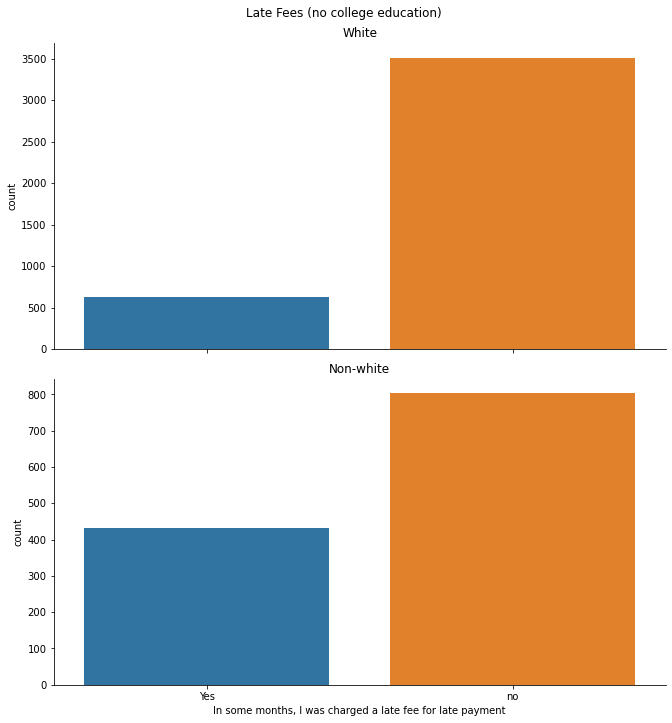

In [341]:
g = sns.catplot(x="F2_4", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] < 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("In some months, I was charged a late fee for late payment")
plt.xticks([0, 1], ['Yes','no']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Late Fees (no college education)');

### TLDR
**hi :]**

## Side jobs by race and education

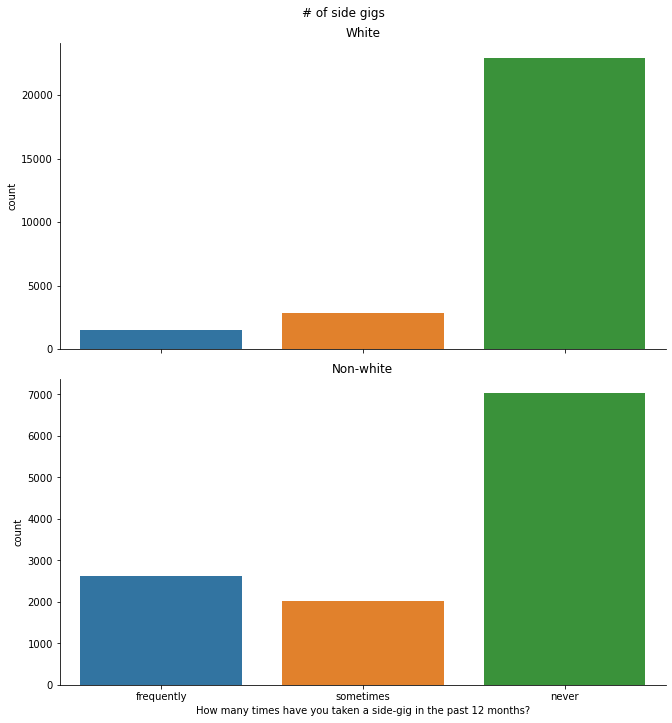

In [342]:
g = sns.catplot(x="B44", 
                row="A4A_new_w", kind = 'count', data=df,
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How many times have you taken a side-gig in the past 12 months?")
plt.xticks([0, 1, 2], ['frequently','sometimes', 'never']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('# of side gigs');

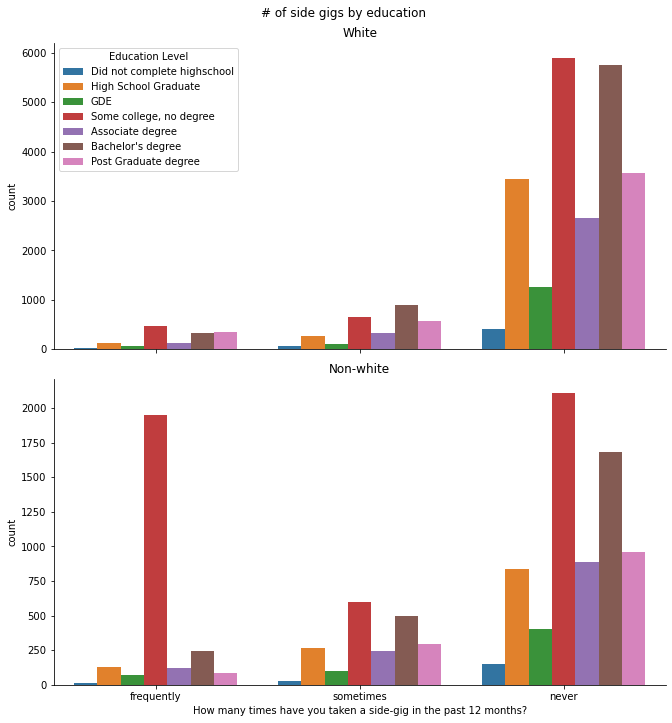

In [343]:
g = sns.catplot(x="B44", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How many times have you taken a side-gig in the past 12 months?")
plt.xticks([0, 1, 2], ['frequently','sometimes', 'never']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('# of side gigs by education');

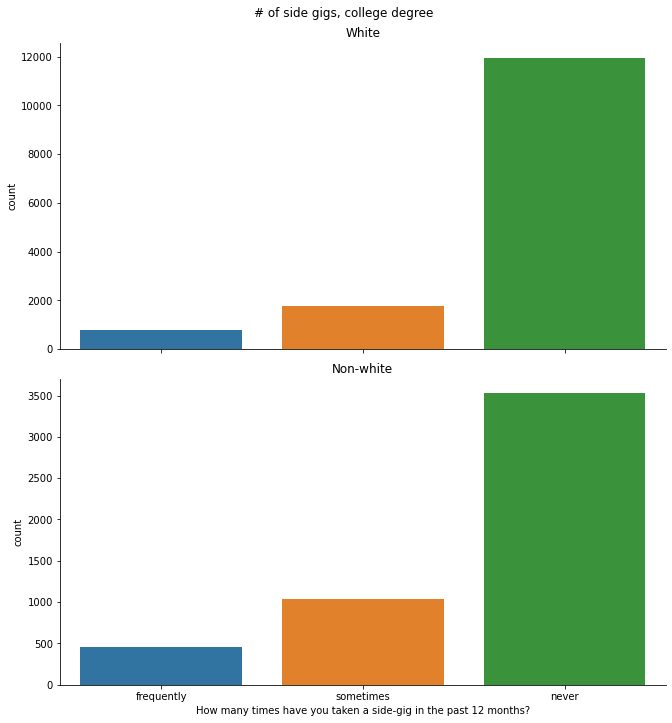

In [344]:
g = sns.catplot(x="B44", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] > 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How many times have you taken a side-gig in the past 12 months?")
plt.xticks([0, 1, 2], ['frequently','sometimes', 'never']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('# of side gigs, college degree');

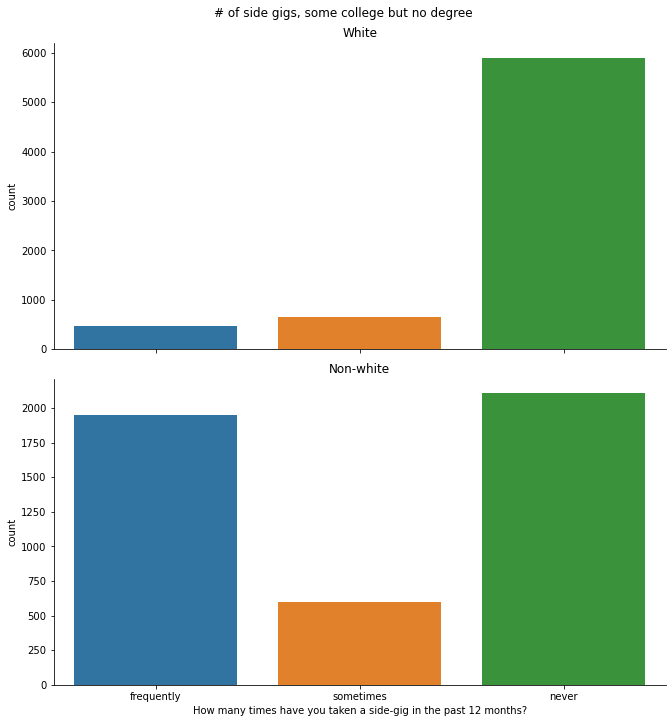

In [345]:
g = sns.catplot(x="B44", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] == 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How many times have you taken a side-gig in the past 12 months?")
plt.xticks([0, 1, 2], ['frequently','sometimes', 'never']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('# of side gigs, some college but no degree');

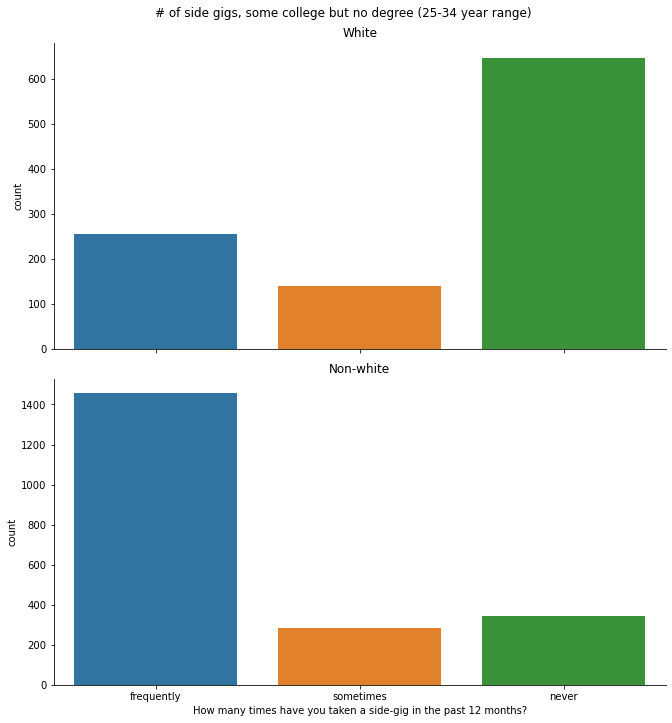

In [346]:
#
g = sns.catplot(x="B44", 
                row="A4A_new_w", kind = 'count', data=df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How many times have you taken a side-gig in the past 12 months?")
plt.xticks([0, 1, 2], ['frequently','sometimes', 'never']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('# of side gigs, some college but no degree (25-34 year range)');

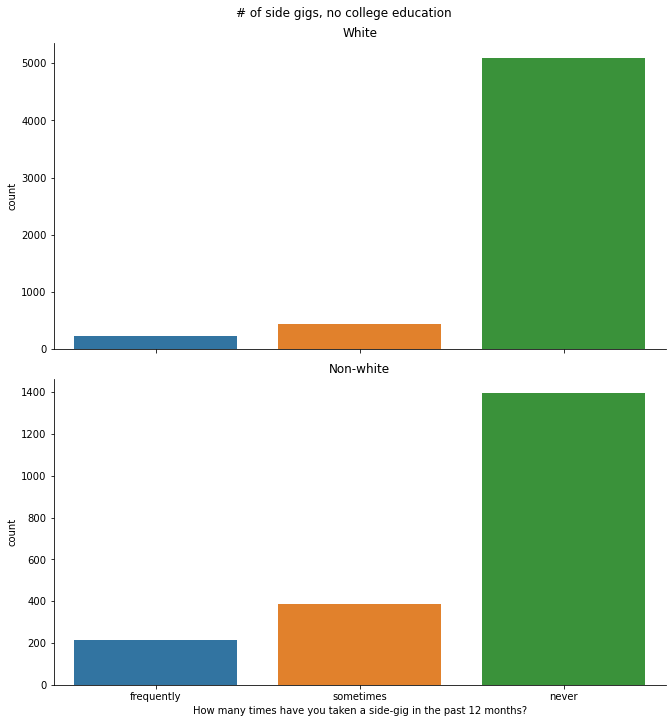

In [347]:
g = sns.catplot(x="B44", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] < 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How many times have you taken a side-gig in the past 12 months?")
plt.xticks([0, 1, 2], ['frequently','sometimes', 'never']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('# of side gigs, no college education');

### TLDR
**Also haven't done a full write up here yet as well, but we can see that there is massive difference between white and non-white individuals who had some college expereince but no degree between the age of 25-34 with regards to side jobs. We see that, especially when taking age into account, there is a complete difference in response, with white individuals, for the most part, having never taking a side job, and a large portion of non-white individuals who have.**

## Financial risk by race and education

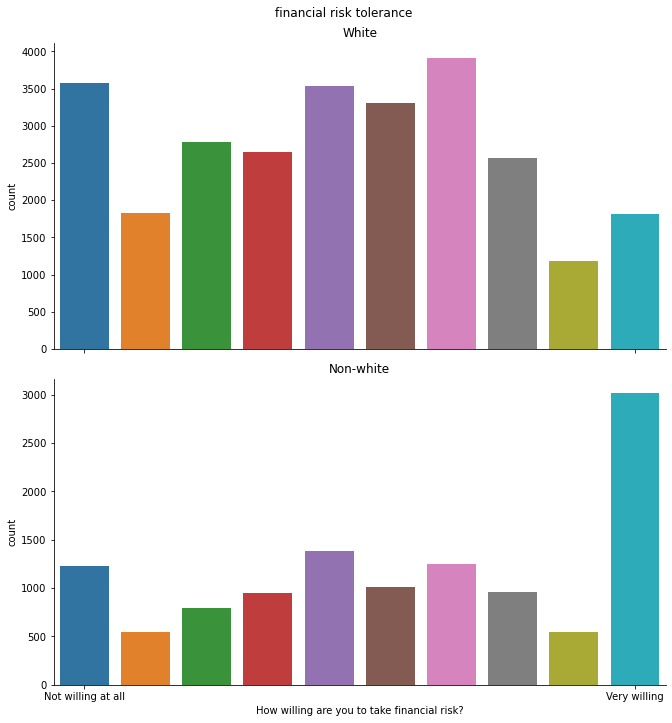

In [348]:
g = sns.catplot(x="J2", 
                row="A4A_new_w", kind = 'count', data=df,
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How willing are you to take financial risk?")
plt.xticks([0, 9], ['Not willing at all','Very willing']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('financial risk tolerance');

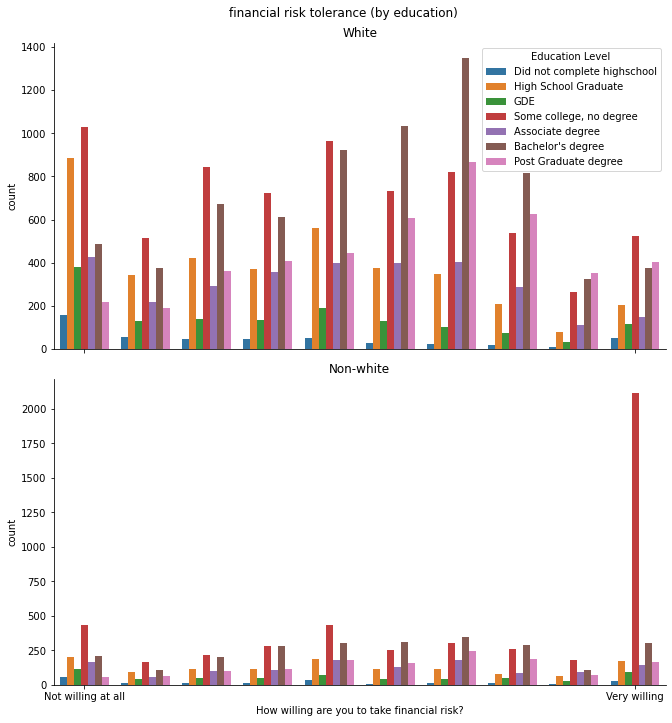

In [349]:
g = sns.catplot(x="J2", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How willing are you to take financial risk?")
plt.xticks([0, 9], ['Not willing at all','Very willing']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('financial risk tolerance (by education)');

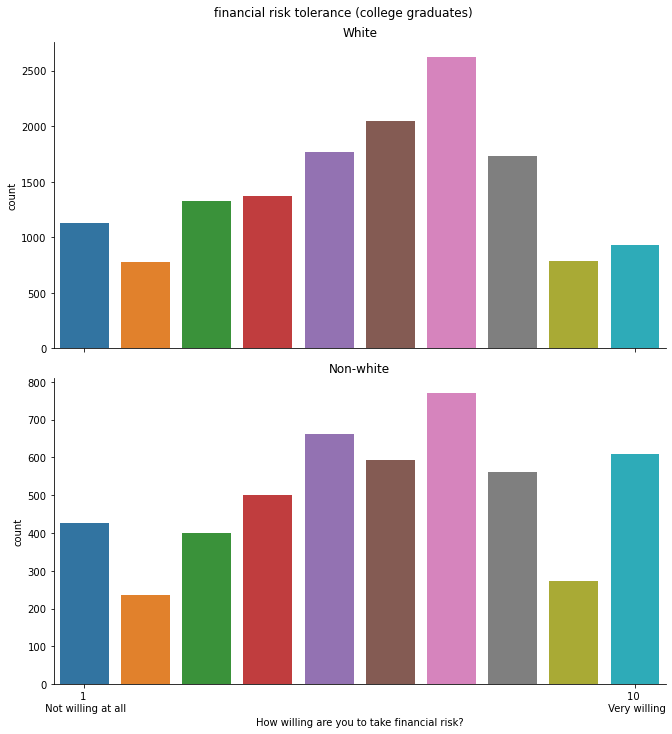

In [350]:
g = sns.catplot(x="J2", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] > 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How willing are you to take financial risk?")
plt.xticks([0, 9], ['1 \n Not willing at all','10 \n Very willing']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('financial risk tolerance (college graduates)');

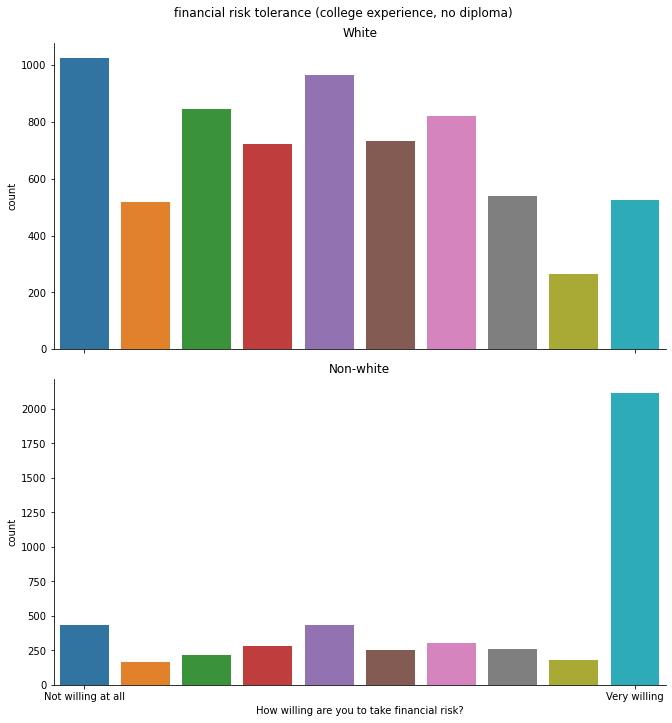

In [351]:
g = sns.catplot(x="J2", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] == 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How willing are you to take financial risk?")
plt.xticks([0, 9], ['Not willing at all','Very willing']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('financial risk tolerance (college experience, no diploma)');

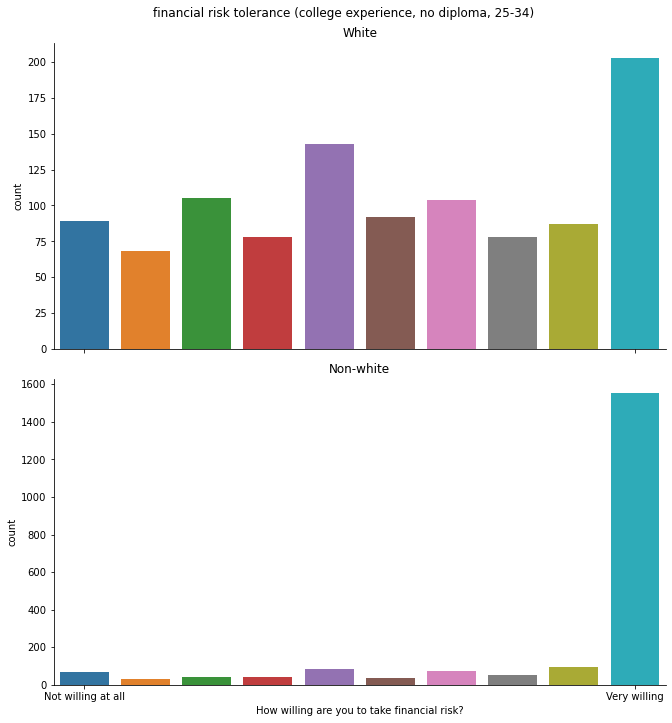

In [352]:
g = sns.catplot(x="J2", 
                row="A4A_new_w", kind = 'count', data=df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How willing are you to take financial risk?")
plt.xticks([0, 9], ['Not willing at all','Very willing']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('financial risk tolerance (college experience, no diploma, 25-34)');

In [353]:
contigency= pd.crosstab(df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)]['J2'], df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)]['A4A_new_w'], normalize='columns')
chi2_contingency(contigency)

(0.6260383020959803,
 0.9999204789157095,
 9,
 array([[0.05884854, 0.05884854],
        [0.04040643, 0.04040643],
        [0.05975865, 0.05975865],
        [0.04758582, 0.04758582],
        [0.08824228, 0.08824228],
        [0.05282928, 0.05282928],
        [0.06793494, 0.06793494],
        [0.05023005, 0.05023005],
        [0.06414343, 0.06414343],
        [0.47002057, 0.47002057]]))

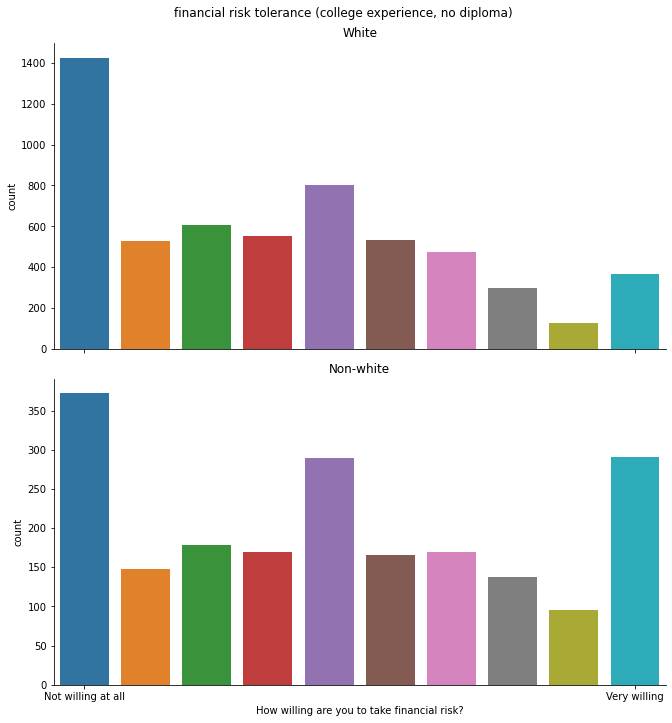

In [354]:
g = sns.catplot(x="J2", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] < 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("How willing are you to take financial risk?")
plt.xticks([0, 9], ['Not willing at all','Very willing']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('financial risk tolerance (college experience, no diploma)');

### TLDR
**No full writeup yet but we can see the same patterns again. Looking at the indivuals with some college education but no diploma, and especially those in the 25-34 age range, we see massive differences with regards to fianncial risk tolerance between white and non-white individuals. We dont see that in other education groups; the general distribution shape is the same, but the magnititude of the distribution seems to suggest that non-white individuals are more incline to be financially risky**

## Paying bills and expenses by race and education

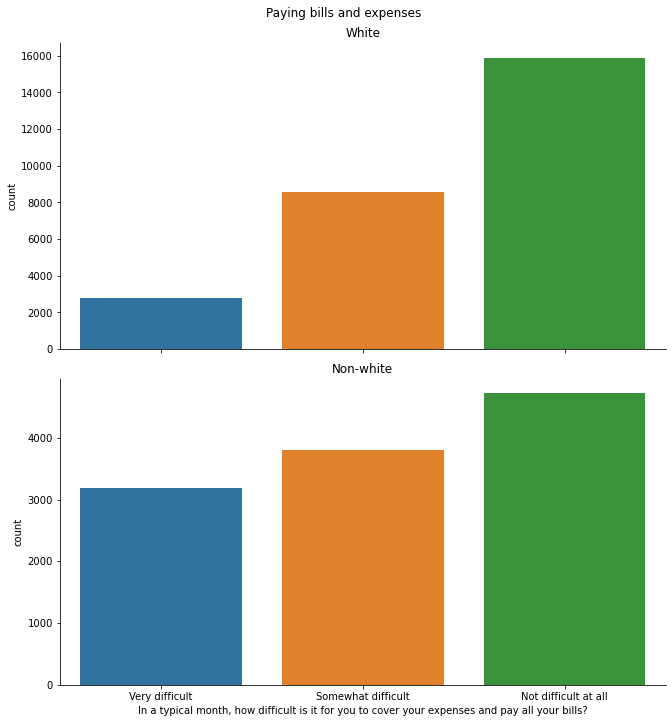

In [355]:
g = sns.catplot(x="J4", 
                row="A4A_new_w", kind = 'count', data=df,
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("In a typical month, how difficult is it for you to cover your expenses and pay all your bills?")
plt.xticks([0, 1, 2], ['Very difficult','Somewhat difficult', 'Not difficult at all']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Paying bills and expenses');

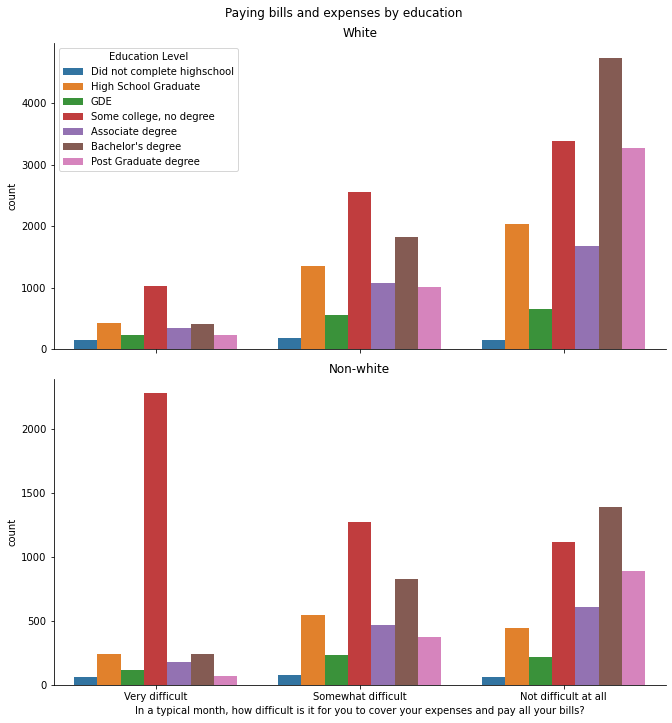

In [356]:
g = sns.catplot(x="J4", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

g._legend.set_title('Education Level')
new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("In a typical month, how difficult is it for you to cover your expenses and pay all your bills?")
plt.xticks([0, 1, 2], ['Very difficult','Somewhat difficult', 'Not difficult at all']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Paying bills and expenses by education');

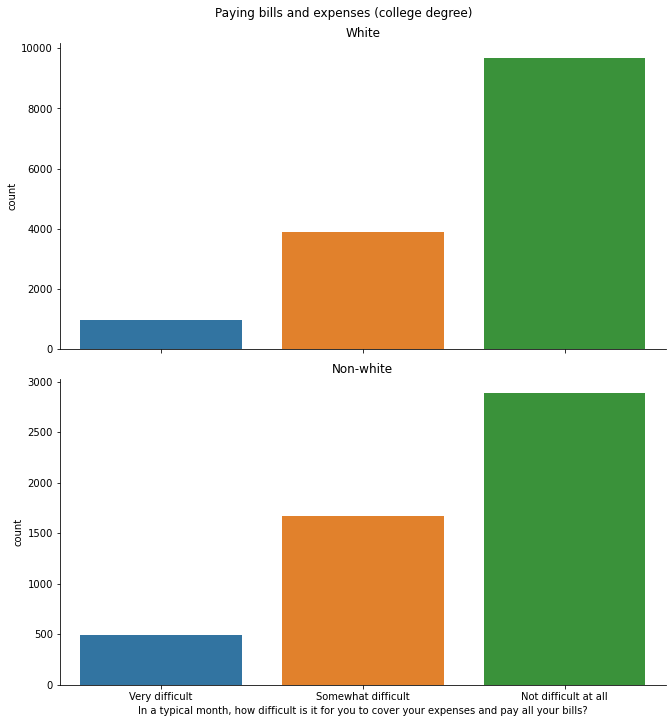

In [357]:
g = sns.catplot(x="J4", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] > 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("In a typical month, how difficult is it for you to cover your expenses and pay all your bills?")
plt.xticks([0, 1, 2], ['Very difficult','Somewhat difficult', 'Not difficult at all']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Paying bills and expenses (college degree)');

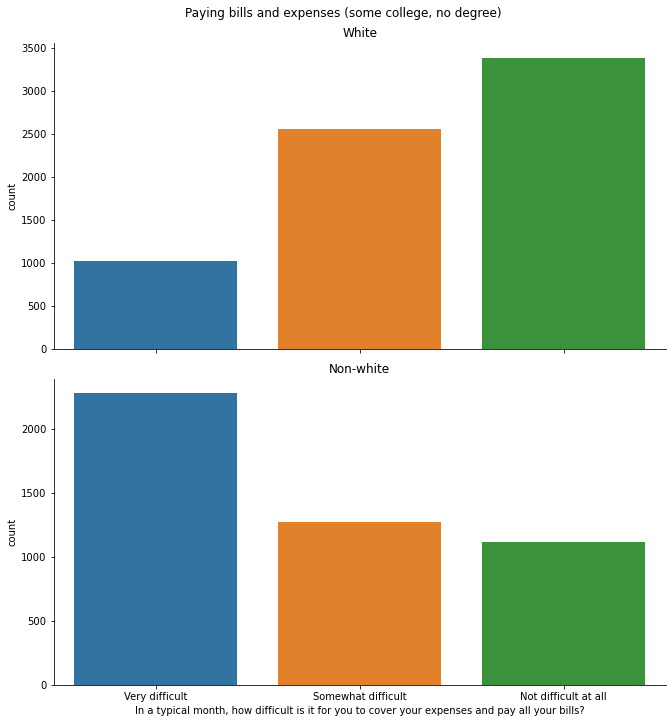

In [358]:

g = sns.catplot(x="J4", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] == 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("In a typical month, how difficult is it for you to cover your expenses and pay all your bills?")
plt.xticks([0, 1, 2], ['Very difficult','Somewhat difficult', 'Not difficult at all']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Paying bills and expenses (some college, no degree)');

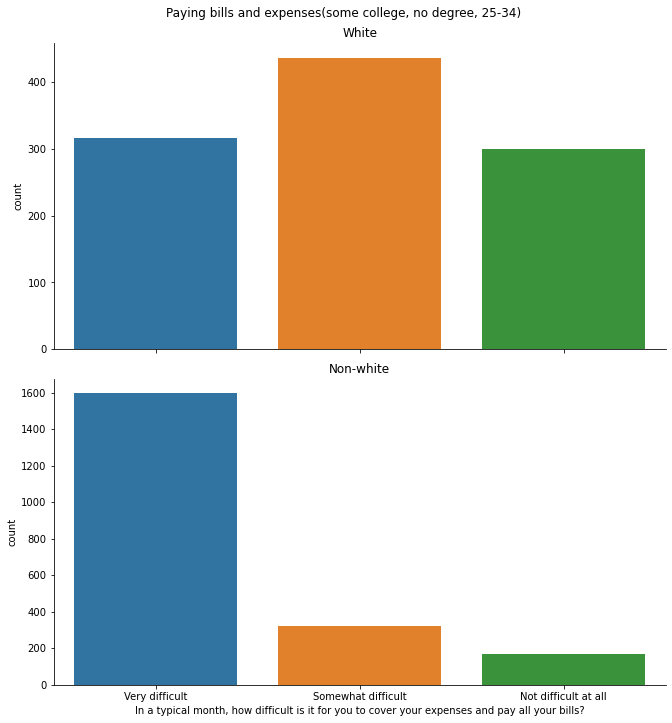

In [359]:
g = sns.catplot(x="J4", 
                row="A4A_new_w", kind = 'count', data=df[(df['A5_2015'] == 4) & (df['A3Ar_w'] == 2)],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("In a typical month, how difficult is it for you to cover your expenses and pay all your bills?")
plt.xticks([0, 1, 2], ['Very difficult','Somewhat difficult', 'Not difficult at all']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Paying bills and expenses(some college, no degree, 25-34)');

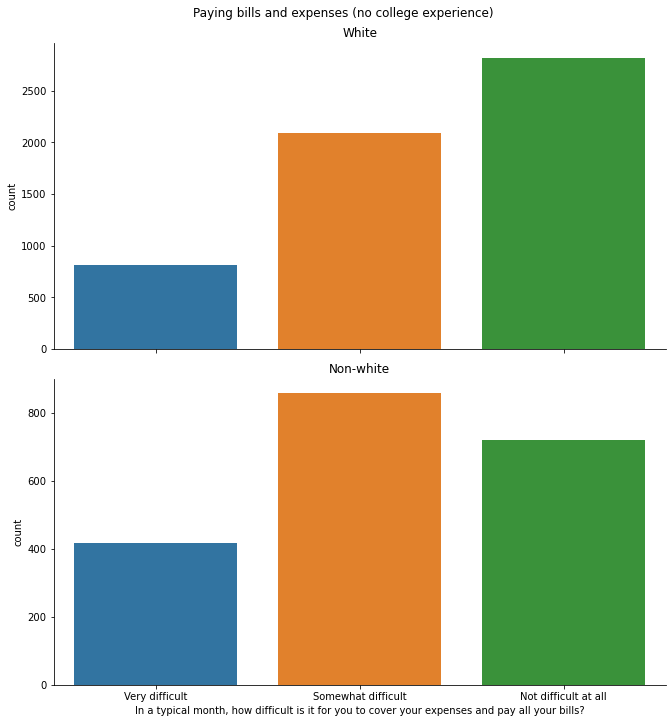

In [360]:

g = sns.catplot(x="J4", 
                row="A4A_new_w", kind = 'count', data=df[df['A5_2015'] < 4],
                #hue = 'A5_2015',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.set_axis_labels("In a typical month, how difficult is it for you to cover your expenses and pay all your bills?")
plt.xticks([0, 1, 2], ['Very difficult','Somewhat difficult', 'Not difficult at all']);

axes = g.axes.flatten();
axes[0].set_title("White");
axes[1].set_title("Non-white");

plt.subplots_adjust(top=.93)
g.fig.suptitle('Paying bills and expenses (no college experience)');

### TLDR
**The difference between white and non-white individuals is again very prevelant in the 'some college, no degree, 25-34' group, with a massive portion of non-white individuals beliveing it is very difficult to cover monthly bills and expenses. These differences are noticed able with those with no college education, just not to the same degree. These differences are fairly diminished in with those who have college degrees.**

## Age and education level

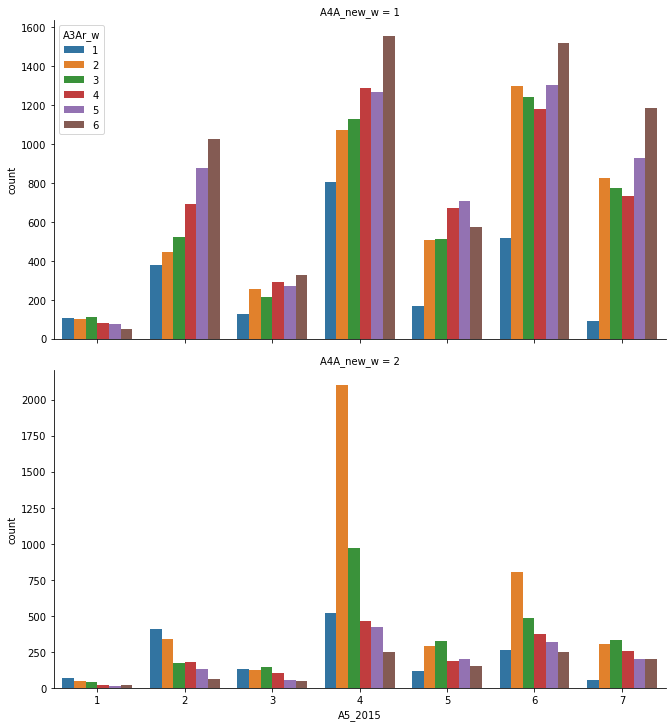

In [361]:
g = sns.catplot(x="A5_2015", 
                row="A4A_new_w", kind = 'count', data=df,
                hue = 'A3Ar_w',
                aspect = 1.85,
                sharex = True,
                sharey = False,
                legend_out= False
                #palette = 'Set2'
               )

#g._legend.set_title('Education Level')
#new_labels = ['Did not complete highschool', 'High School Graduate', 'GDE', 'Some college, no degree', 'Associate degree', 'Bachelor\'s degree', 'Post Graduate degree']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#g.set_axis_labels("How many times have you taken a side-gig in the past 12 months?")
#plt.xticks([0, 1, 2], ['frequently','sometimes', 'never']);

#axes = g.axes.flatten();
#axes[0].set_title("White");
#axes[1].set_title("Non-white");

#plt.subplots_adjust(top=.93)
#g.fig.suptitle('# of side gigs');

# random stuff

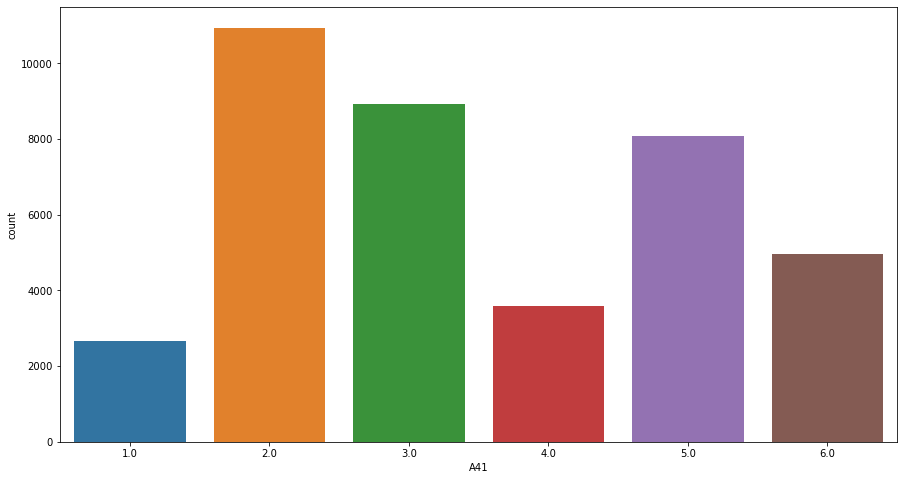

In [362]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(
    data = df,
    x = 'A41',
    #palette = 'Set3'
)
#plt.xlabel("Did you recieve Financial education?");
#plt.xticks([0, 1], ['no', 'yes']);
# 0 is no, 1 is yes

In [363]:
df.A41.value_counts()

2.0    10943
3.0     8923
5.0     8072
6.0     4950
4.0     3580
1.0     2665
Name: A41, dtype: int64

In [364]:
J20s_df1 = df.groupby('A5_2015').J20.value_counts(normalize=True)
J20s_df1 = pd.DataFrame(J20s_df1.unstack())
J20s_df1

J20,1.0,2.0,3.0,4.0
A5_2015,,,,
1,0.172989,0.188164,0.165402,0.473445
2,0.394982,0.229866,0.143262,0.231890
3,0.308198,0.245951,0.158907,0.286943
4,0.515575,0.195315,0.116876,0.172234
5,0.456517,0.237585,0.131965,0.173933
6,0.618075,0.222032,0.071765,0.088128
7,0.704910,0.193282,0.055814,0.045995


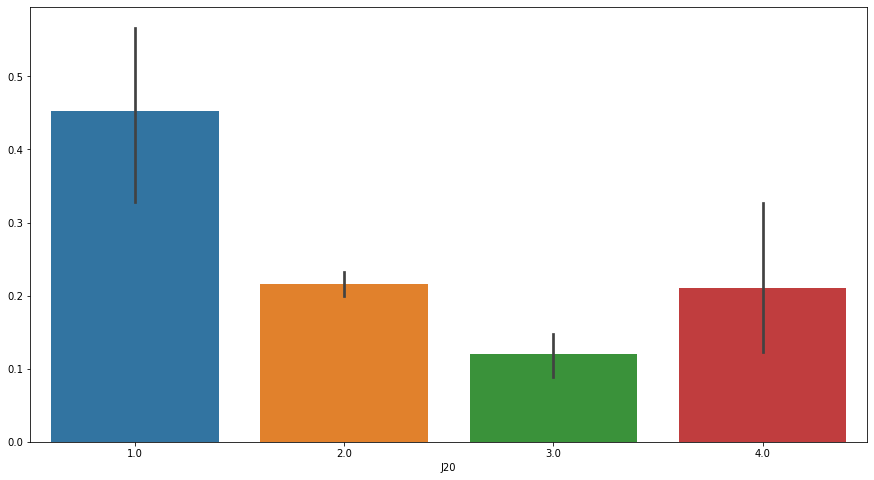

In [365]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(
    data = J20s_df1,
    #x = 'A5_2015',
    #hue = 'A5_2015',
    #palette = 'Set3'
)

In [366]:
bill = df.groupby(['A4A_new_w'])['G23'].value_counts(normalize = True).sort_index() *100

KeyError: KeyError: 0

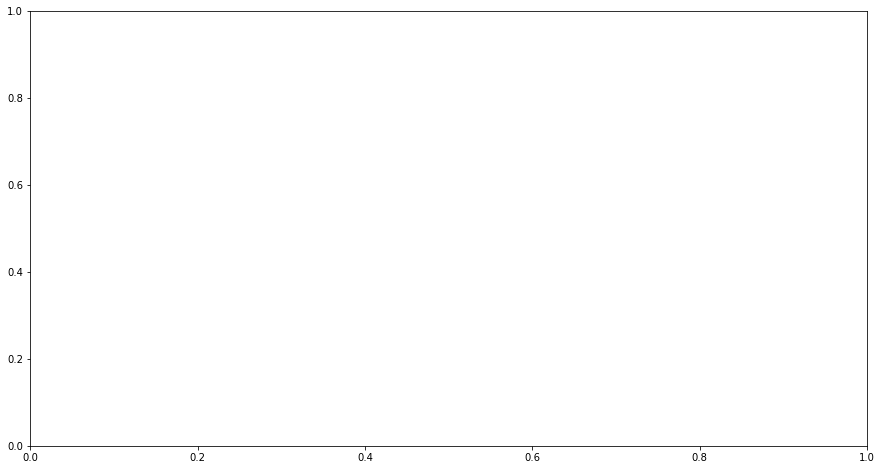

In [367]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(
    data = bill,
    #x = 'A5_2015',
    #hue = 'A5_2015',
    #palette = 'Set3'
)

In [368]:
tempdf=df.groupby(['A4A_new_w','G23']).A4A_new_w.count().unstack()
tempdf['total']=df['G23'].value_counts()
tempdf
#tempdf['percent']=tempdf[0]/tempdf['total']*100

#tempdf.reset_index(inplace=True)
#print (tempdf)

#sns.barplot(x='G23',y='percent',data=tempdf)

G23,1.0,2.0,3.0,4.0,5.0,6.0,7.0,total
A4A_new_w,,,,,,,,
1,9573,2429,1649,3867,2796,2041,5116,12346
2,2773,782,637,1588,1130,790,4052,3211


In [369]:
round(df[df['A4A_new_w'] == 2].groupby(['A5_2015'])['A3Ar_w'].value_counts(normalize = True).sort_index() *100, 2)

A5_2015  A3Ar_w
1        1         34.13
         2         21.63
         3         18.75
         4          9.62
         5          7.69
         6          8.17
2        1         31.56
         2         25.87
         3         13.39
         4         14.09
         5         10.08
         6          5.00
3        1         21.88
         2         20.72
         3         23.85
         4         16.45
         5          9.05
         6          8.06
4        1         11.01
         2         44.47
         3         20.55
         4          9.74
         5          8.92
         6          5.31
5        1          9.06
         2         22.89
         3         25.47
         4         14.77
         5         15.86
         6         11.95
6        1         10.43
         2         32.17
         3         19.49
         4         15.08
         5         12.80
         6         10.03
7        1          4.29
         2         22.47
         3         24.54
         

In [370]:
round(df[df['A4A_new_w'] == 1].groupby(['A5_2015'])['A3Ar_w'].value_counts(normalize = True).sort_index() *100, 2)

A5_2015  A3Ar_w
1        1         19.89
         2         19.51
         3         21.02
         4         15.53
         5         14.20
         6          9.85
2        1          9.62
         2         11.27
         3         13.25
         4         17.61
         5         22.20
         6         26.06
3        1          8.66
         2         17.26
         3         14.51
         4         19.41
         5         18.07
         6         22.10
4        1         11.34
         2         15.04
         3         15.84
         4         18.12
         5         17.81
         6         21.87
5        1          5.30
         2         16.15
         3         16.27
         4         21.38
         5         22.59
         6         18.32
6        1          7.33
         2         18.37
         3         17.58
         4         16.71
         5         18.46
         6         21.55
7        1          1.99
         2         18.20
         3         17.09
         

In [371]:
df[df['A4A_new_w'] == 2]['A5_2015'].value_counts(normalize=True) * 100

4    39.517207
6    20.823588
7    11.301370
2    10.850317
5    10.691614
3     5.078517
1     1.737387
Name: A5_2015, dtype: float64

In [372]:
#debt
wut = df.groupby(['A4A_new_w'])['G23'].value_counts(normalize = True).sort_index().unstack()

In [373]:
wut

G23,1.0,2.0,3.0,4.0,5.0,6.0,7.0
A4A_new_w,,,,,,,
1,0.348477,0.088421,0.060027,0.140767,0.101780,0.074297,0.186233
2,0.235960,0.066542,0.054204,0.135126,0.096154,0.067223,0.344792


In [374]:
wut[1][1]

0.3484765752975865